<a href="https://colab.research.google.com/github/Proj-Caliber/Job-Care/blob/kimseonhong/job_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 56 kB/s 


In [ ]:
## 모듈 불러오기

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [ ]:
import catboost

print(catboost.__version__)

1.0.4


In [ ]:
import xgboost

print(xgboost.__version__)

0.90


1. 속성명이 같은 경우 (ex : 속성 D) 동일한 코드를 가지고 있으면 동일한 내용을 포함하고 있다. 즉 회원 속성과 컨텐츠 속성의 일치여부 및 수치를 비교할 수 있다.
(순서형 : 속성E 명목형 : 속성A, 속성C, 속성D, 속성H


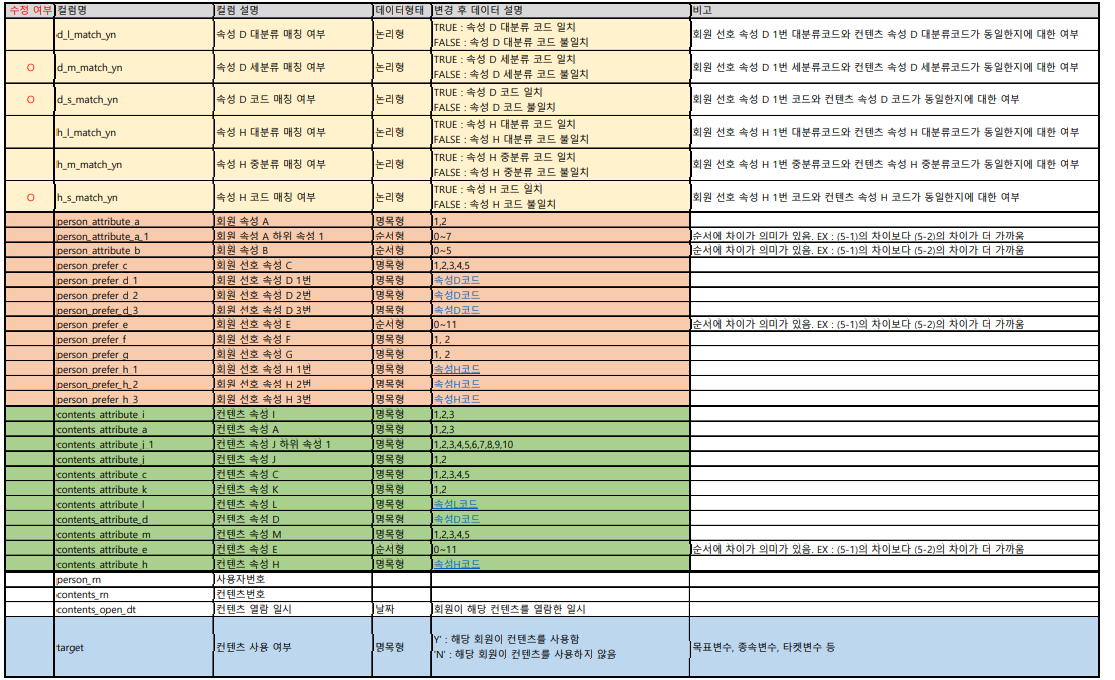

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/jobcare/train.csv',parse_dates=['contents_open_dt'])

d_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_D_코드.csv', index_col=0).T.to_dict()

h_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_H_코드.csv', index_col=0).T.to_dict()

l_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_L_코드.csv', index_col=0).T.to_dict()

test = pd.read_csv('/content/drive/MyDrive/jobcare/test.csv',parse_dates=['contents_open_dt'])

In [ ]:
# 데이터 보기
data.head()

id  d_l_match_yn  d_m_match_yn  ...  contents_rn    contents_open_dt  target
0   0          True          True  ...       354805 2020-01-17 12:09:36       1
1   1         False         False  ...       346213 2020-06-18 17:48:52       0
2   2         False         False  ...       206408 2020-07-08 20:00:10       0
3   3         False         False  ...       572323 2020-01-13 18:09:34       0
4   4          True          True  ...       573899 2020-03-09 20:39:22       0

[5 rows x 35 columns]

In [ ]:
test.head()

id  d_l_match_yn  d_m_match_yn  ...  person_rn  contents_rn    contents_open_dt
0   0          True         False  ...     393790       236865 2020-12-01 02:24:18
1   1         False         False  ...     394058       236572 2020-12-17 05:42:53
2   2          True         False  ...    1002061       704612 2020-12-10 23:33:41
3   3          True         False  ...    1000813       704652 2020-12-03 19:44:55
4   4          True         False  ...     111146       704413 2020-12-11 21:24:34

[5 rows x 34 columns]

In [ ]:
print(data.shape)
print(test.shape)


(501951, 35)
(46404, 34)


In [ ]:
#결측치 확인하기
data.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
dtype: int64

In [ ]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
dtype: int64

모든데이터 결측치 없음을 확인

In [ ]:
# 각 칼럼의 value_counts 확인
for i in data.columns : 
  print( i,'의 value_count')
  print(data[i].value_counts())
  print('-'*50)

id 의 value_count
2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
--------------------------------------------------
d_l_match_yn 의 value_count
True     315268
False    186683
Name: d_l_match_yn, dtype: int64
--------------------------------------------------
d_m_match_yn 의 value_count
False    368324
True     133627
Name: d_m_match_yn, dtype: int64
--------------------------------------------------
d_s_match_yn 의 value_count
False    426694
True      75257
Name: d_s_match_yn, dtype: int64
--------------------------------------------------
h_l_match_yn 의 value_count
True     399338
False    102613
Name: h_l_match_yn, dtype: int64
--------------------------------------------------
h_m_match_yn 의 value_count
False    318818
True     183133
Name: h_m_match_yn, dtype: int64
--------------------------------------------------
h_s_match_yn 의 value_count
False    365322
Tru

코드를 그대로 사용했습니다.

https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

- 변경된 데이터에 맞도록 코드를 수정하였습니다.
- 매칭 여부 컬럼 (1~6 번째 컬럼) 과 속성코드로부터 구한 매칭 여부를 비교했습니다. (모두 일치)

제공 데이터에는 훈련, 테스트 데이터와 속성 코드 파일이 나뉘어 있습니다.
아래 코드는 데이터와 속성 코드를 매칭해 줍니다.

분류코드에 따라 아래와 같이 구분자를 붙혀 구분합니다.

n: 세분류코드 

s: 소분류코드   

m: 중분류코드 

l: 대분류코드 

In [ ]:
def add_code(df, d_code, h_code, l_code):
    
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

train_data = add_code(data, d_code, h_code, l_code)
test_data = add_code(test, d_code, h_code, l_code)

print(train_data.shape)
print(test_data.shape)

(501951, 63)
(46404, 62)


In [ ]:
train_data.head()

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0   0          True  ...                    1605                    2016
1   1         False  ...                    1605                    2016
2   2         False  ...                    1572                    2016
3   3         False  ...                    1605                    2016
4   4          True  ...                    1605                    2016

[5 rows x 63 columns]

In [ ]:
test_data.head()

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0   0          True  ...                    1021                    2010
1   1         False  ...                    1605                    2016
2   2          True  ...                    1810                    2020
3   3          True  ...                      99                    2006
4   4          True  ...                     954                    2009

[5 rows x 62 columns]

In [ ]:
# True = 1, False = 0 으로 바꿔주기

for i in train_data.columns[1:7] :
  train_data[i+'_1'] = 0
for i in train_data.columns[1:7] :
  train_data.loc[train_data[i] == True, i+'_1'] = 1

In [ ]:
for i in train_data.columns[1:7] : 
  train_data[i] = train_data[i+'_1']

In [ ]:
train_data = train_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [ ]:
train_data

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0            0             1  ...                    1605                    2016
1            1             0  ...                    1605                    2016
2            2             0  ...                    1572                    2016
3            3             0  ...                    1605                    2016
4            4             1  ...                    1605                    2016
...        ...           ...  ...                     ...                     ...
501946  501946             0  ...                     346                    2006
501947  501947             1  ...                      99                    2006
501948  501948             1  ...                     407                    2006
501949  501949             1  ...                     651                    2006
501950  501950             1  ...                     759                    2006

[501951 rows x 63 columns]

In [ ]:
for i in test_data.columns[1:7] :
  test_data[i+'_1'] = 0
for i in test_data.columns[1:7] :
  test_data.loc[test_data[i] == True, i+'_1'] = 1

for i in test_data.columns[1:7] : 
  test_data[i] = test_data[i+'_1']

test_data = test_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [ ]:
test_data

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0          0             1  ...                    1021                    2010
1          1             0  ...                    1605                    2016
2          2             1  ...                    1810                    2020
3          3             1  ...                      99                    2006
4          4             1  ...                     954                    2009
...      ...           ...  ...                     ...                     ...
46399  46399             1  ...                     759                    2006
46400  46400             1  ...                     759                    2006
46401  46401             1  ...                     759                    2006
46402  46402             1  ...                     759                    2006
46403  46403             1  ...                     759                    2006

[46404 rows x 62 columns]

# 각 칼럼 별 상관계수를 알아보자

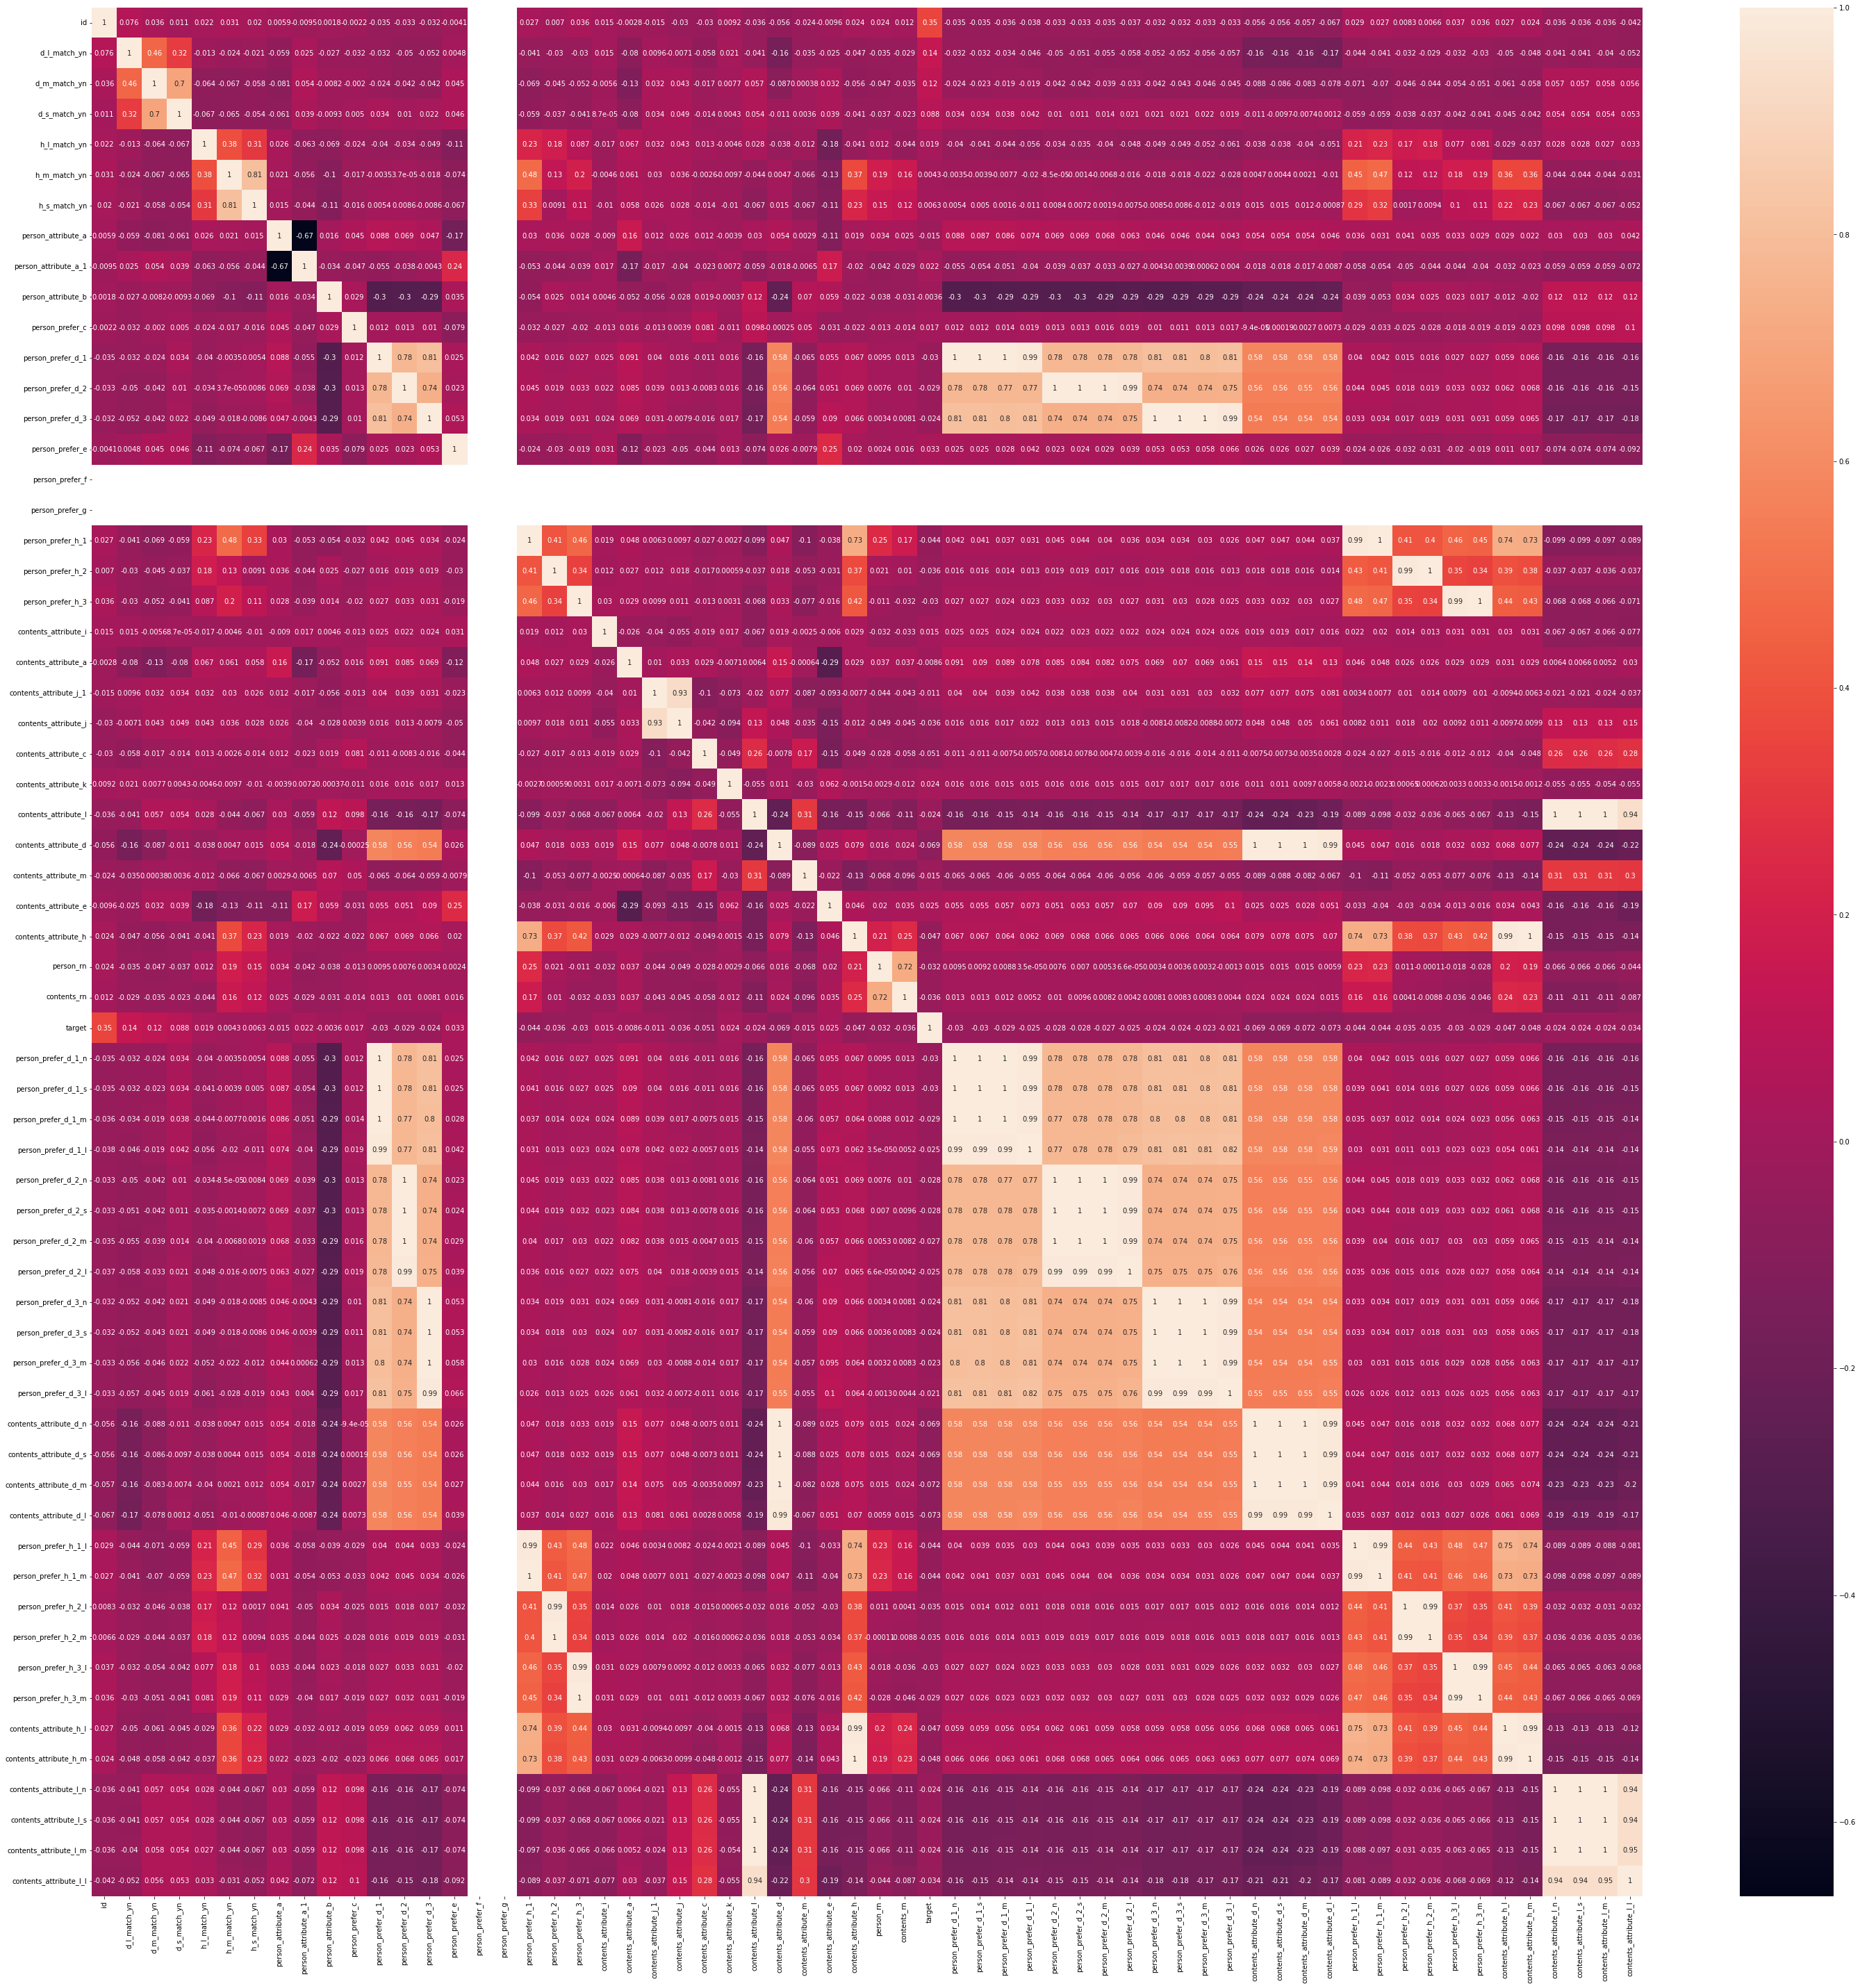

In [ ]:
plt.figure(figsize = (50, 50))
sns.heatmap(train_data.corr(), annot = True)

# 각 속성별 분포를 알아보자

## 회원 A 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

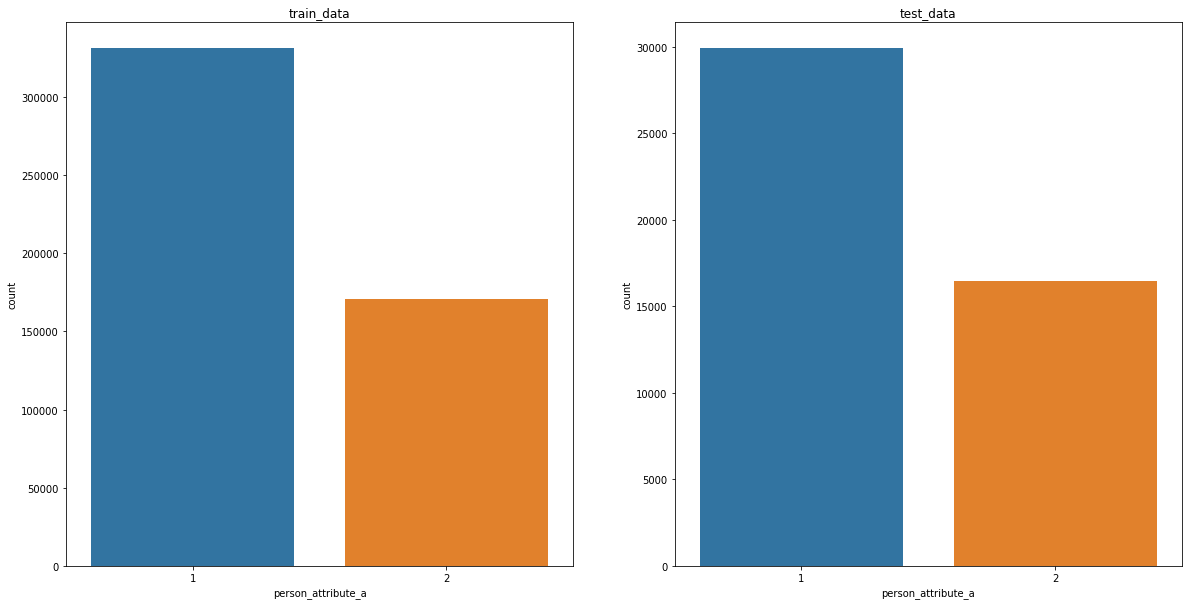

In [ ]:
# person_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a'], ax = ax[0])
sns.countplot(test_data['person_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

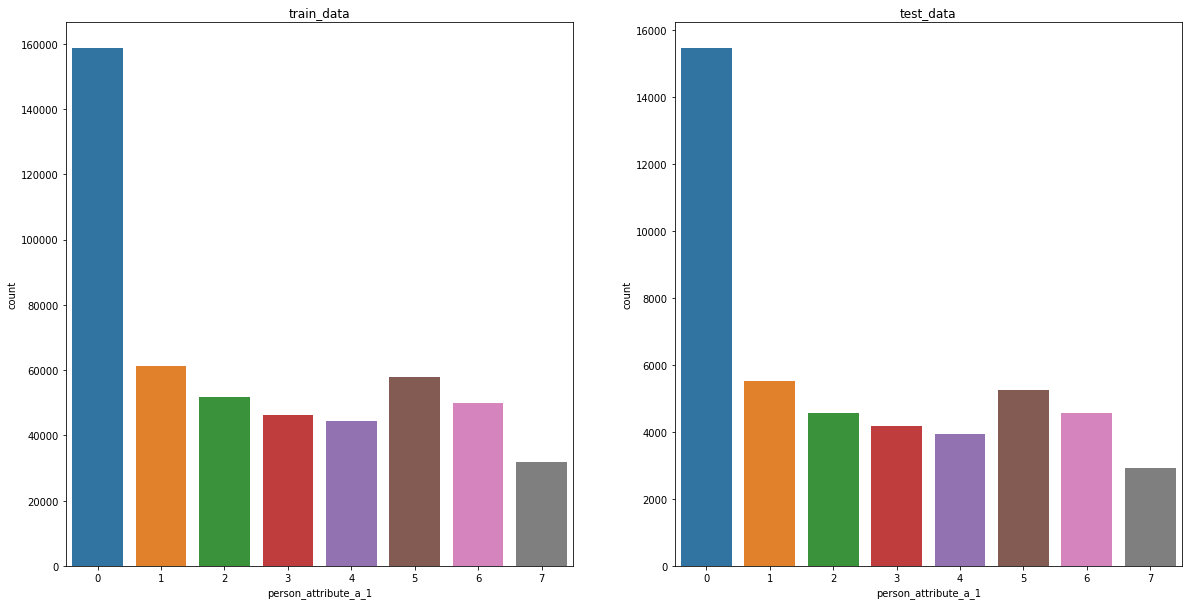

In [ ]:
# person_attribute_a_1
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a_1'], ax = ax[0])
sns.countplot(test_data['person_attribute_a_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

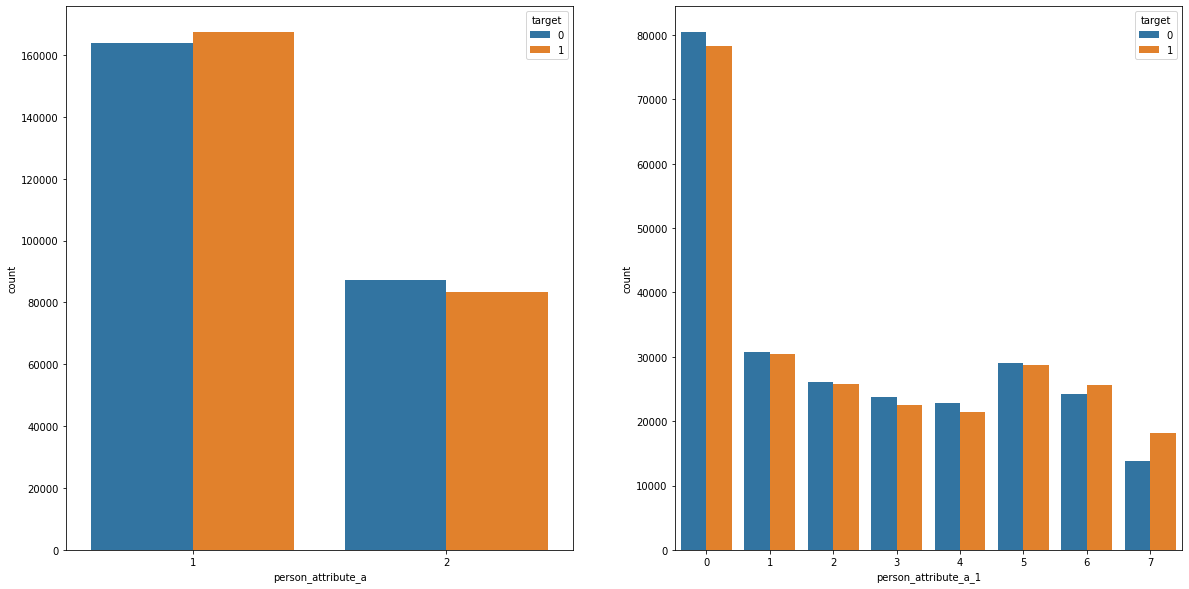

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_a', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_attribute_a_1', hue = 'target', ax = ax[1])

## 회원 B 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

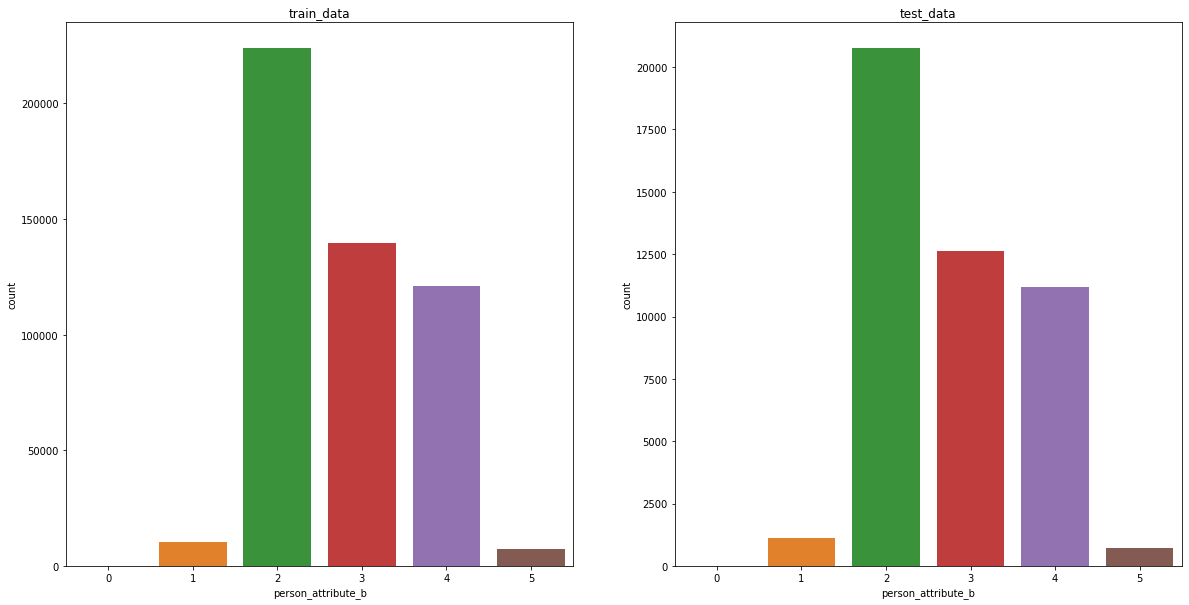

In [ ]:
# person_attribute_b
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_b'], ax = ax[0])
sns.countplot(test_data['person_attribute_b'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

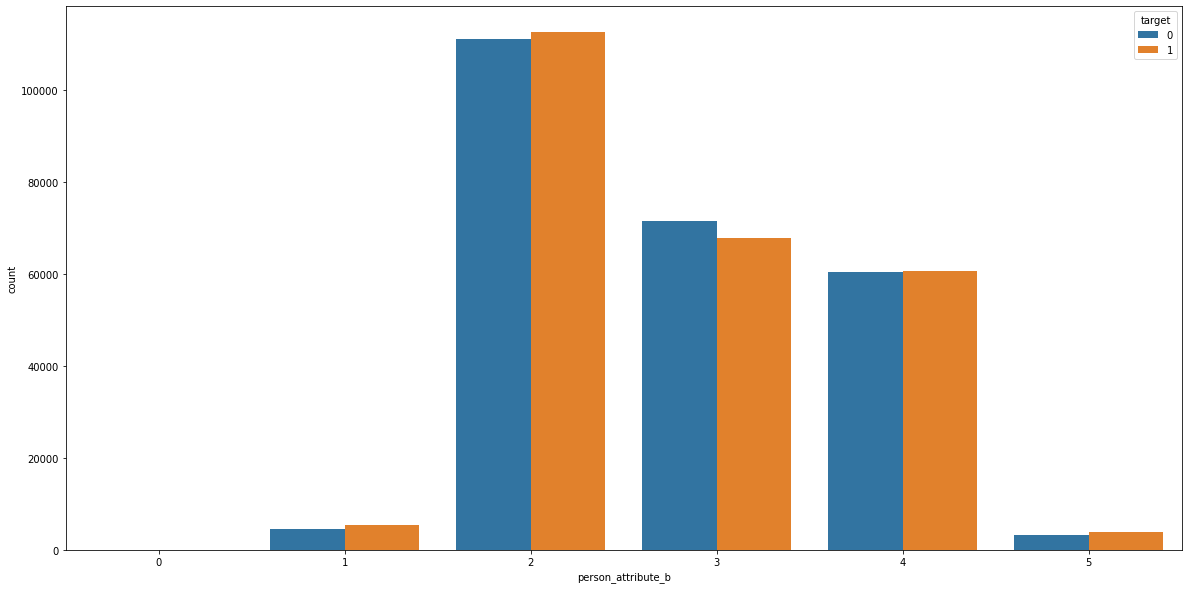

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_b', hue = 'target')

## 회원 선호 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

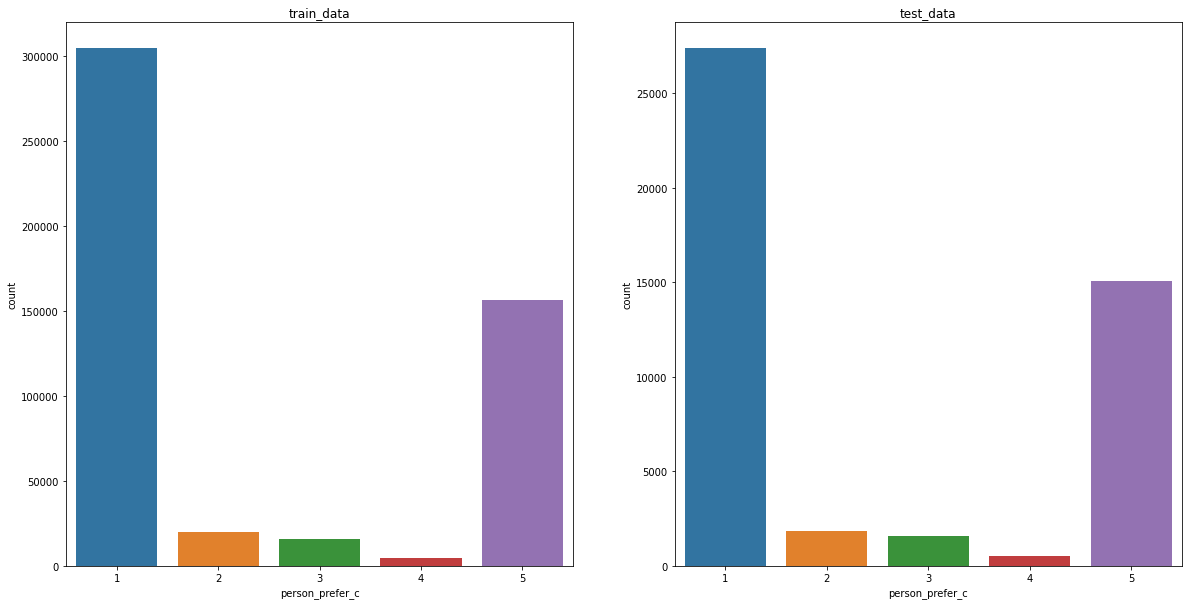

In [ ]:
# person_prefer_c
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_c'], ax = ax[0])
sns.countplot(test_data['person_prefer_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

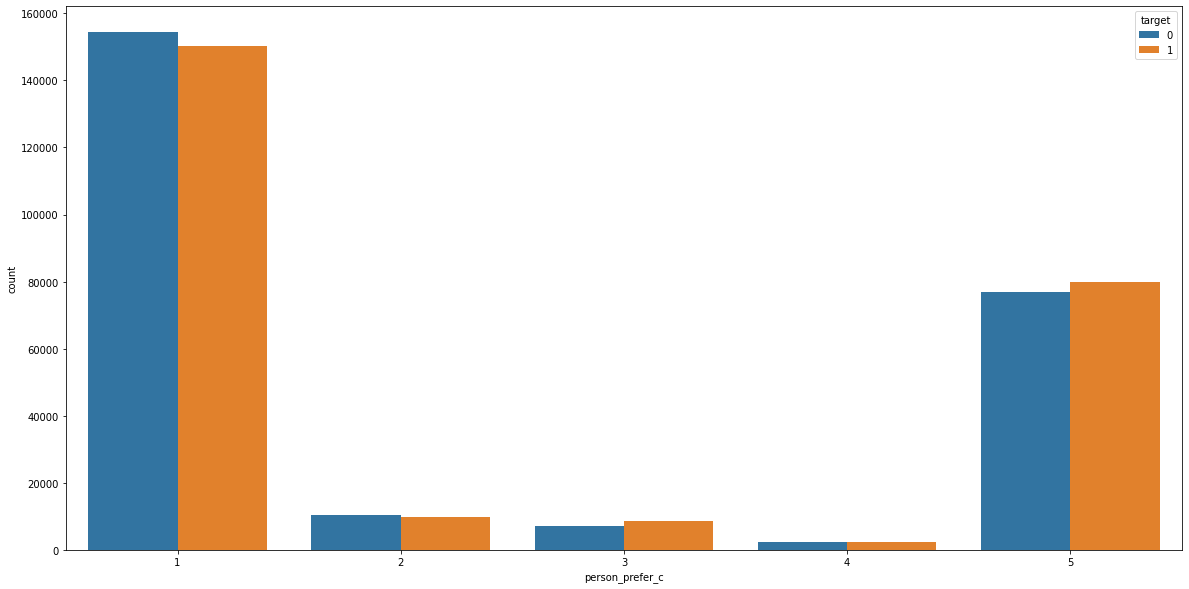

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_c', hue = 'target')

## 회원 선호 속성 D

train에는 있고 test에는 없는 데이터들이 있다(이러한 부분들은 어떻게 해야 될지 생각을 해보자)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

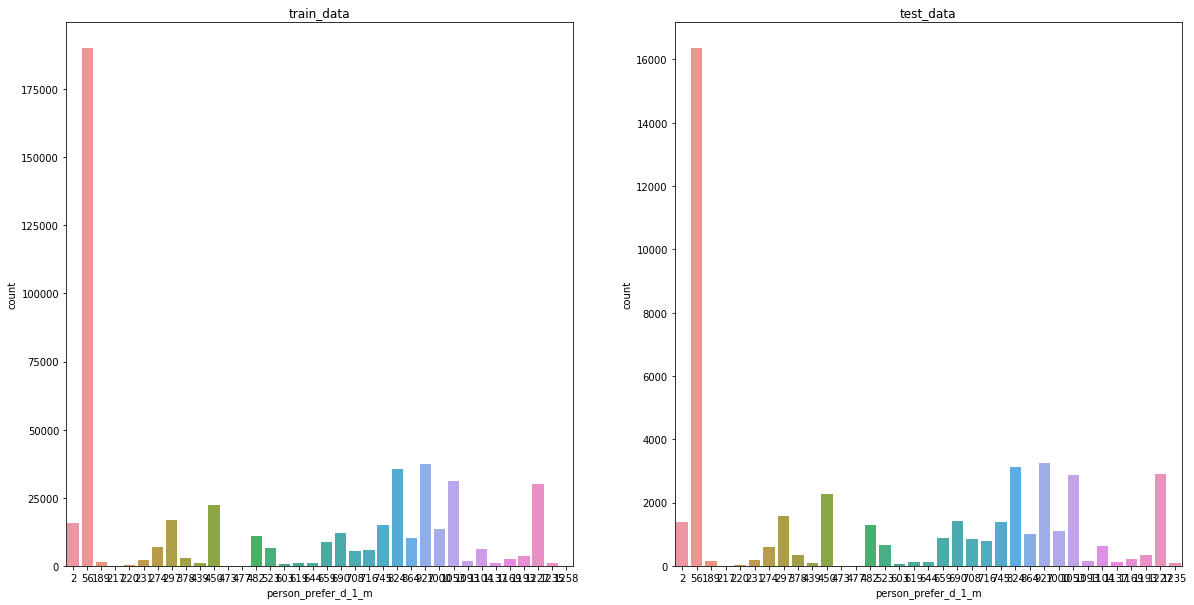

In [ ]:
# person_prefer_d_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

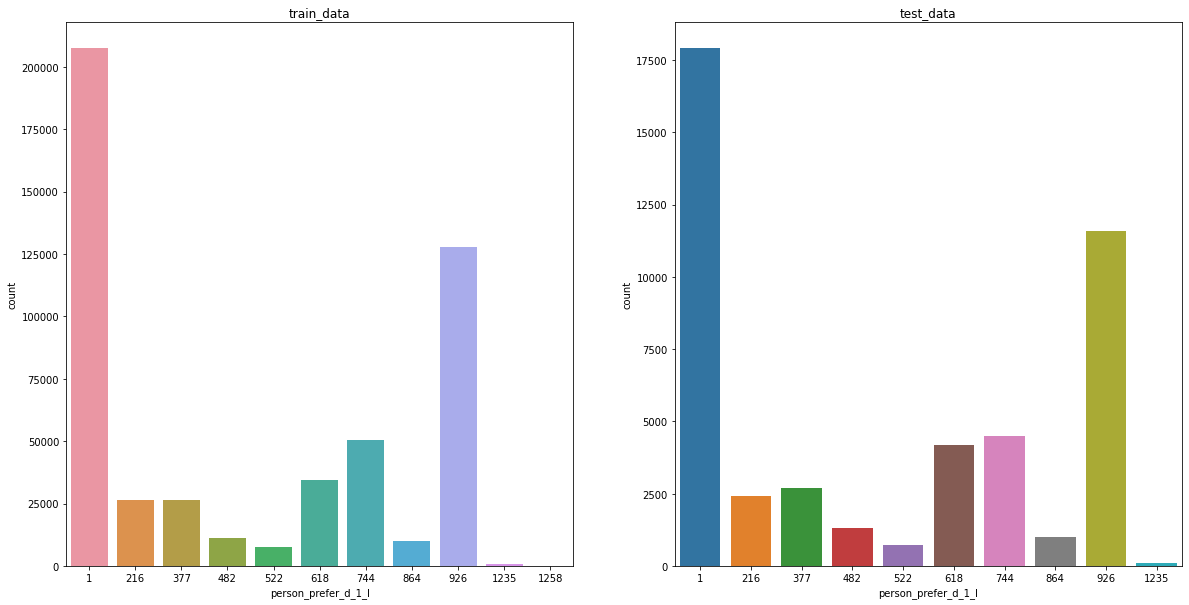

In [ ]:
# person_prefer_d_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [ ]:
print('train : ', train_data['person_prefer_d_1_l'].value_counts())
print('test : ', test_data['person_prefer_d_1_l'].value_counts())

train :  1       207446
926     127675
744      50314
618      34409
377      26351
216      26244
482      11144
864      10069
522       7398
1235       897
1258         4
Name: person_prefer_d_1_l, dtype: int64
test :  1       17907
926     11592
744      4506
618      4191
377      2701
216      2404
482      1294
864      1002
522       710
1235       97
Name: person_prefer_d_1_l, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

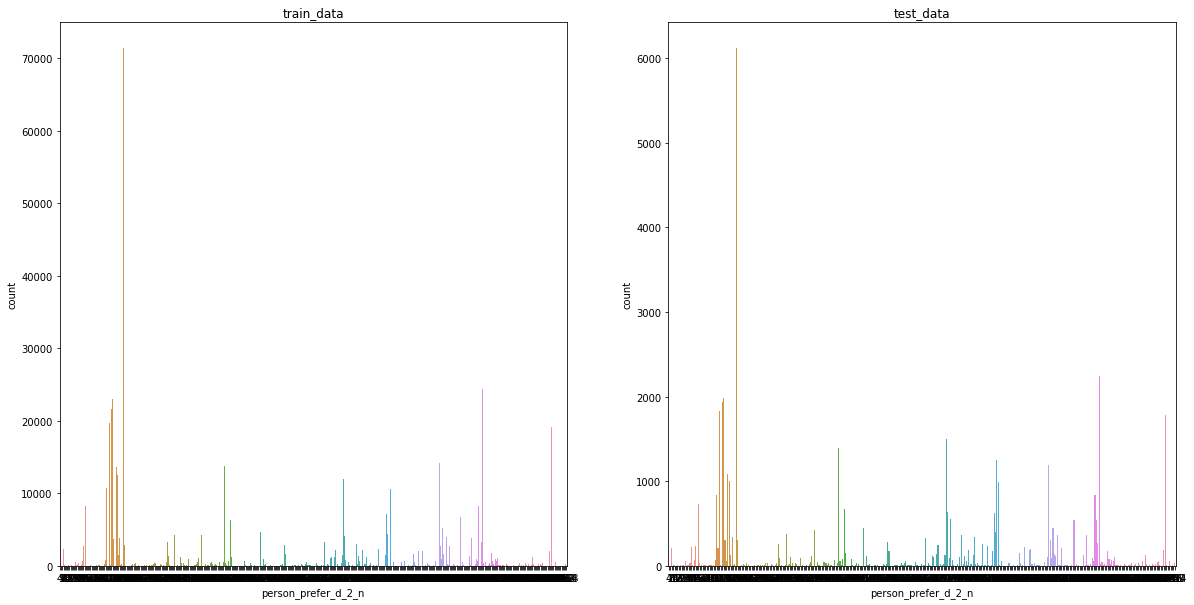

In [ ]:
# person_prefer_d_2_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

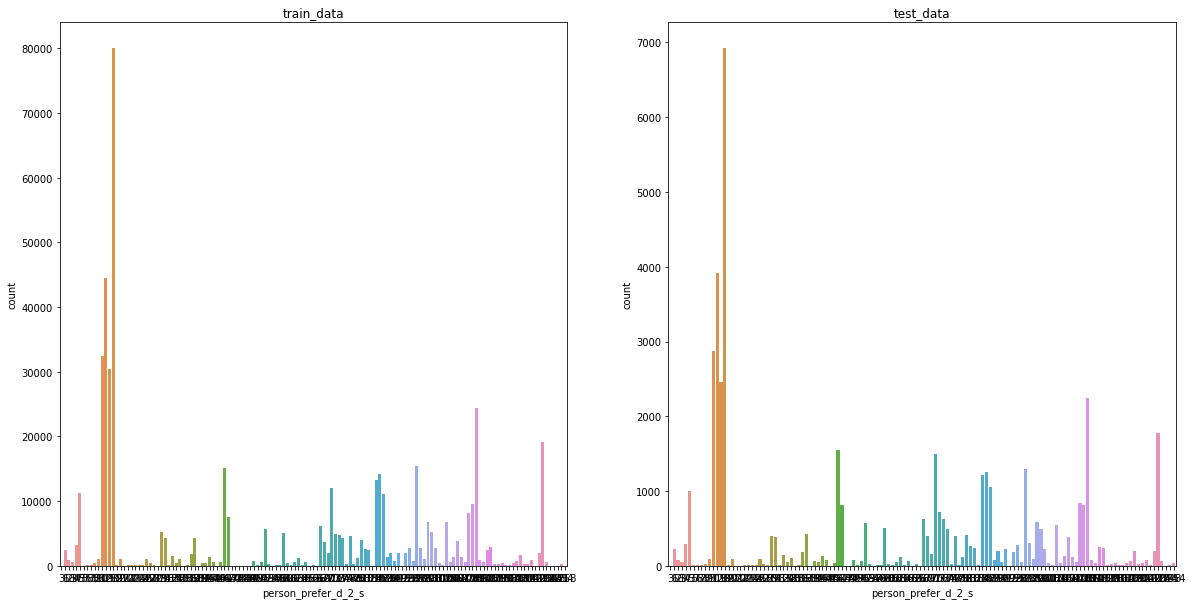

In [ ]:
# person_prefer_d_2_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

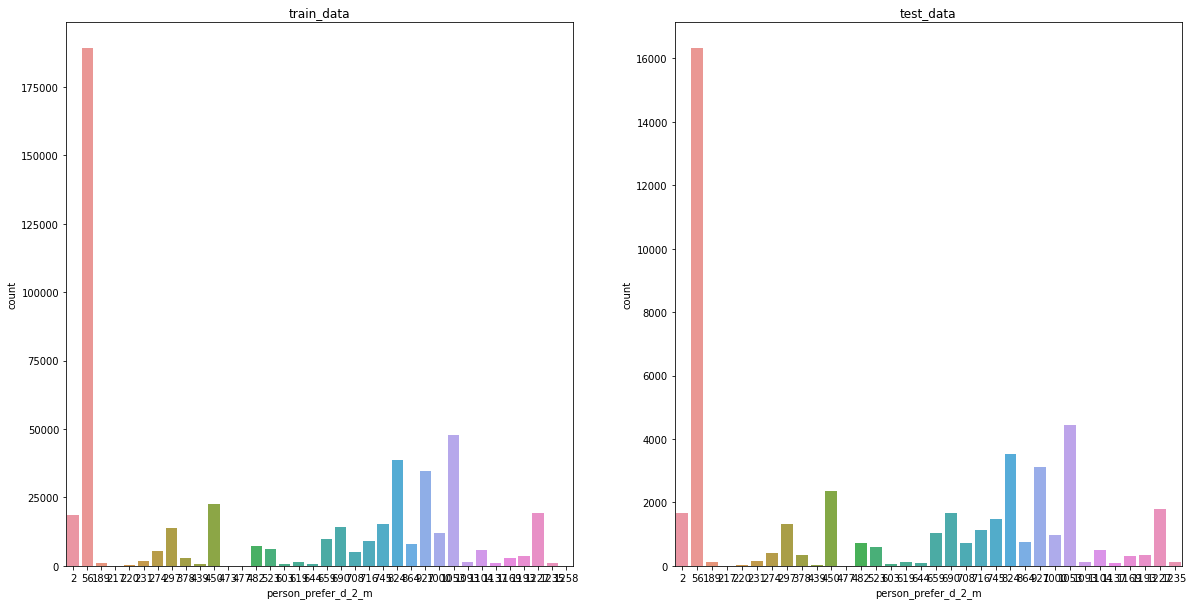

In [ ]:
# person_prefer_d_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

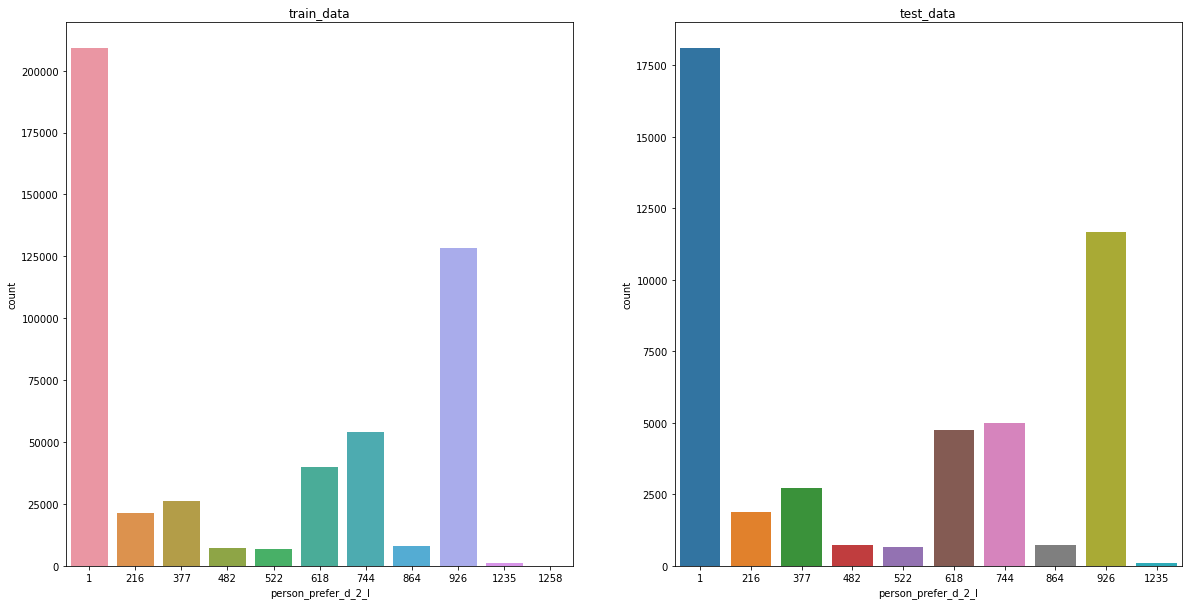

In [ ]:
# person_prefer_d_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

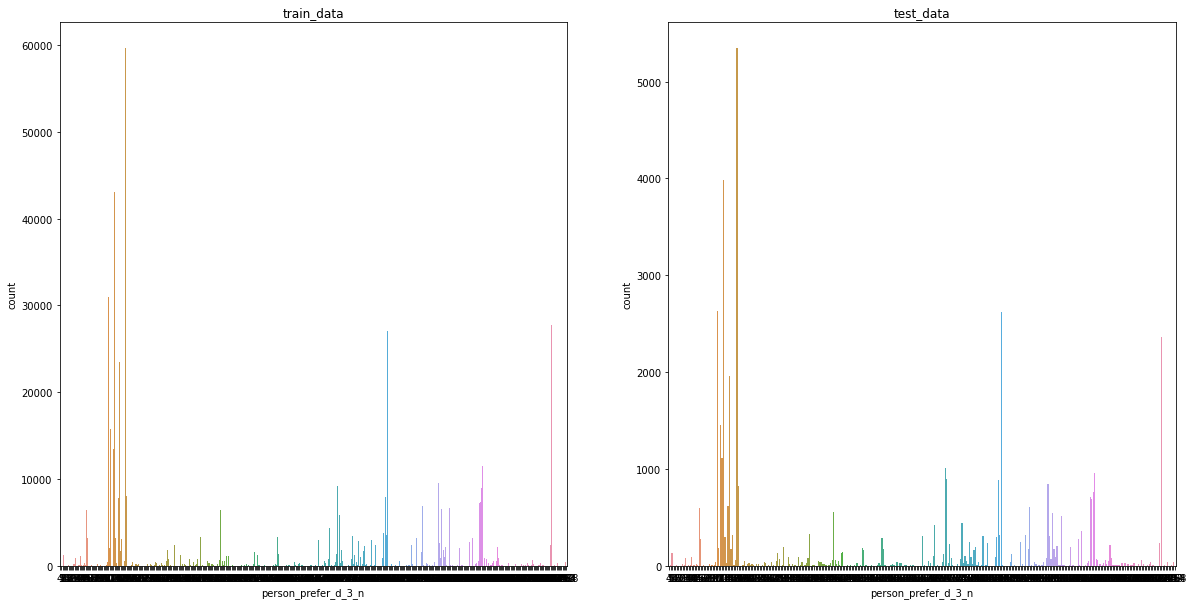

In [ ]:
# person_prefer_d_3_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

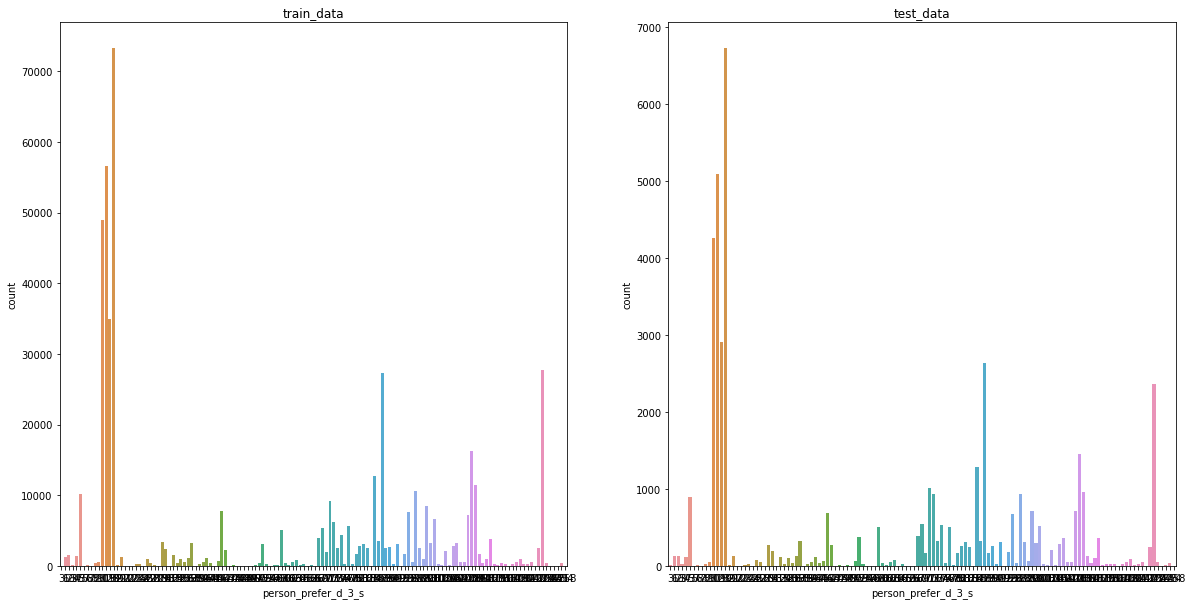

In [ ]:
# person_prefer_d_3_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

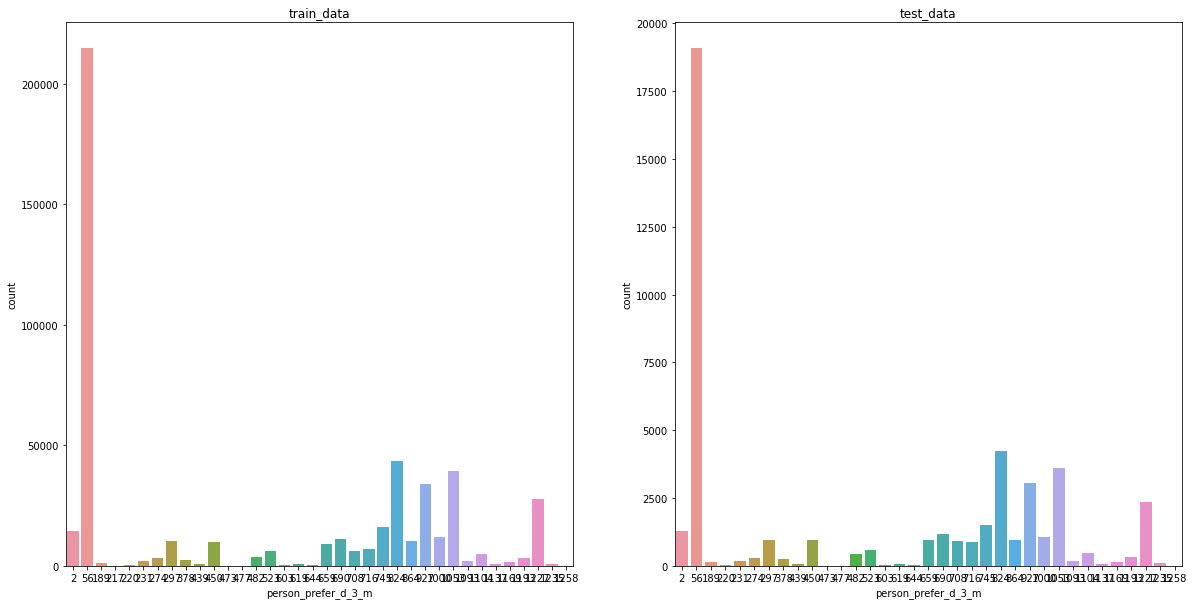

In [ ]:
# person_prefer_d_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

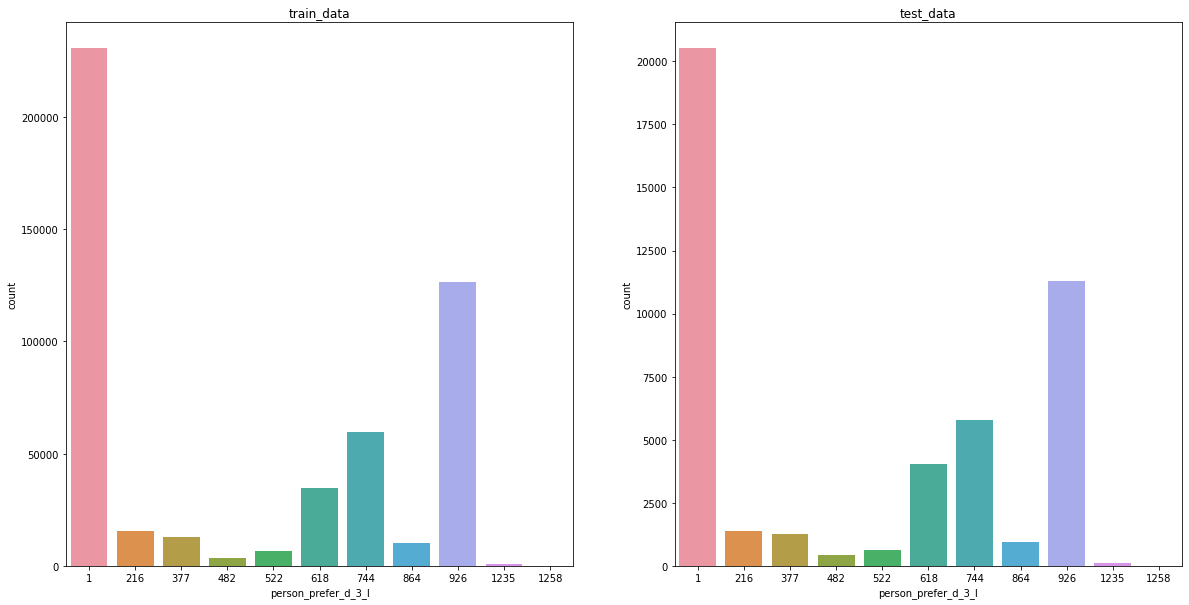

In [ ]:
# person_prefer_d_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

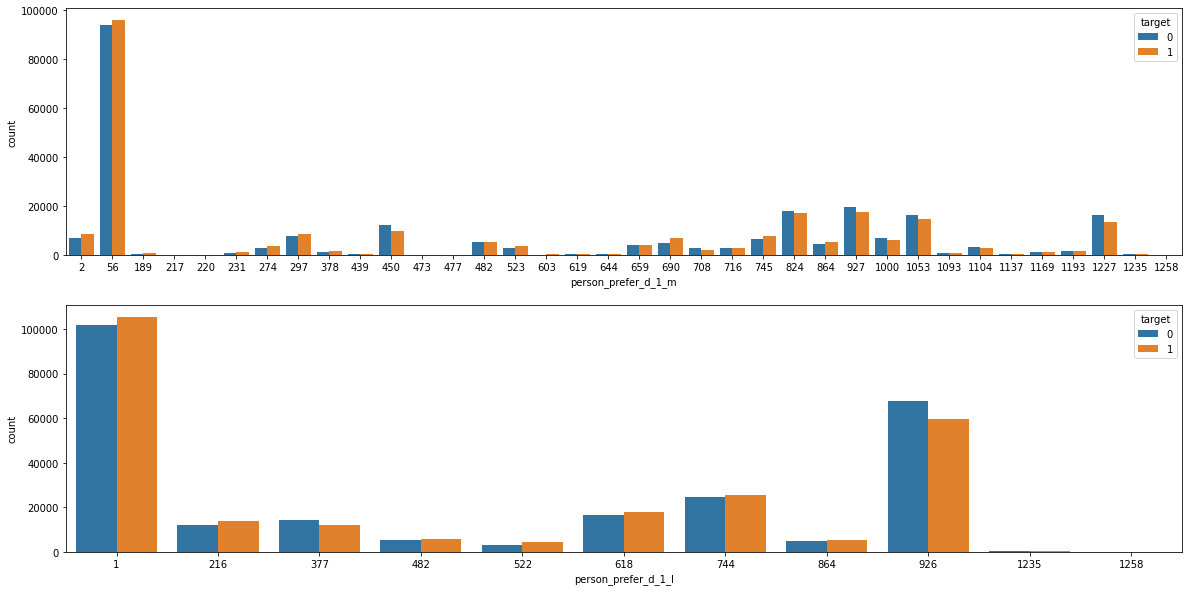

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_1_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_1_l', hue = 'target', ax = ax[1])

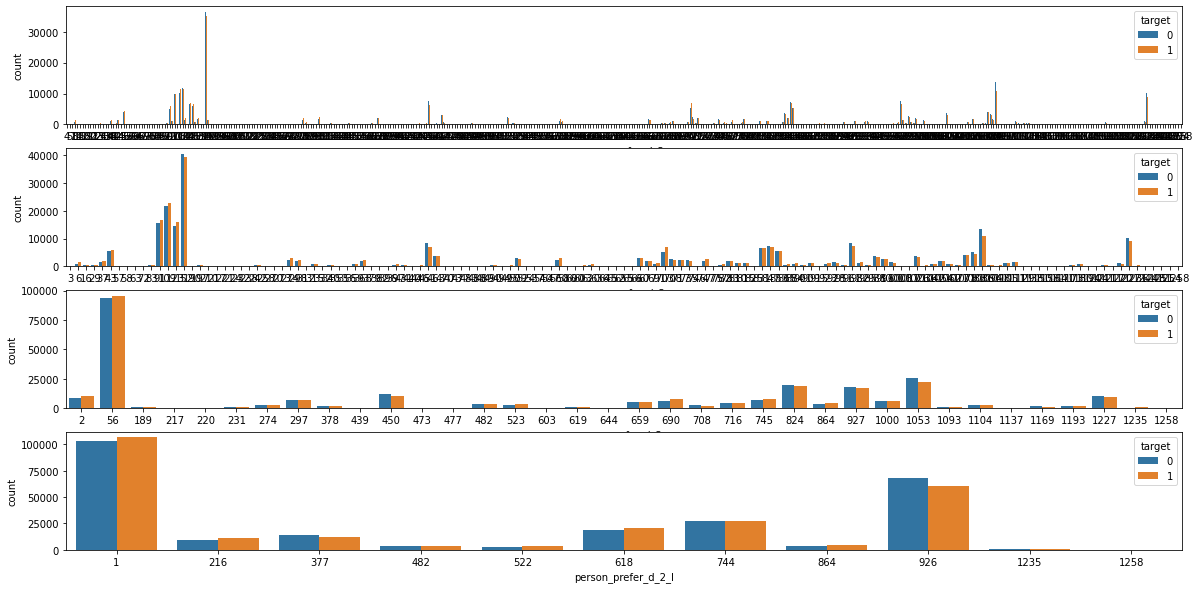

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_2_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_2_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_2_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_2_l', hue = 'target', ax = ax[3])

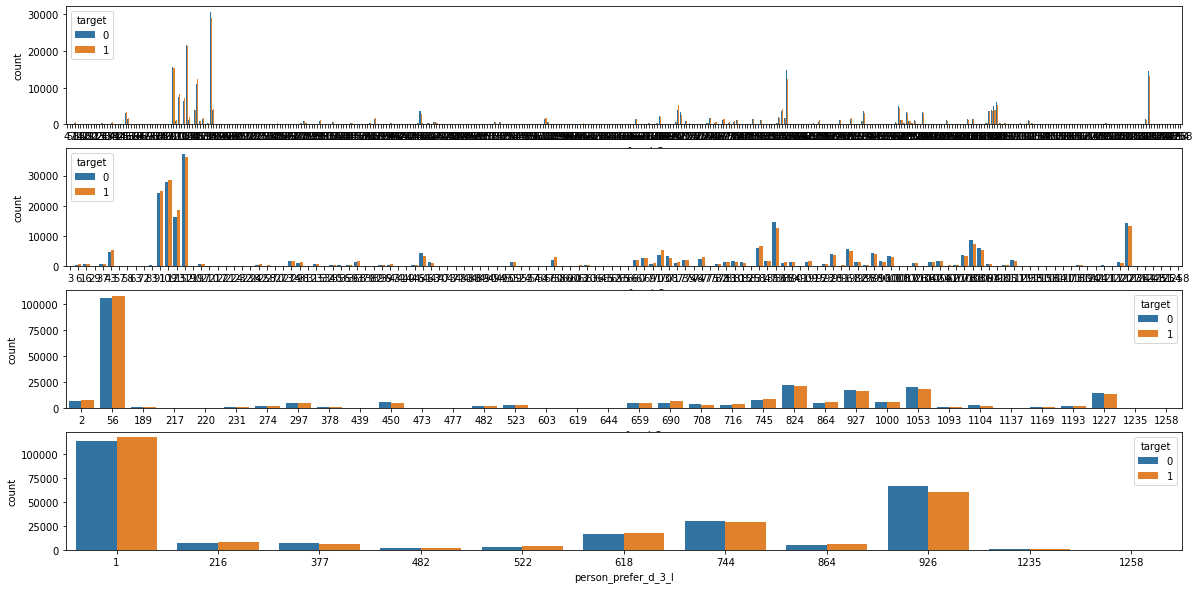

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_3_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_3_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_3_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_3_l', hue = 'target', ax = ax[3])

## 회원 선호 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

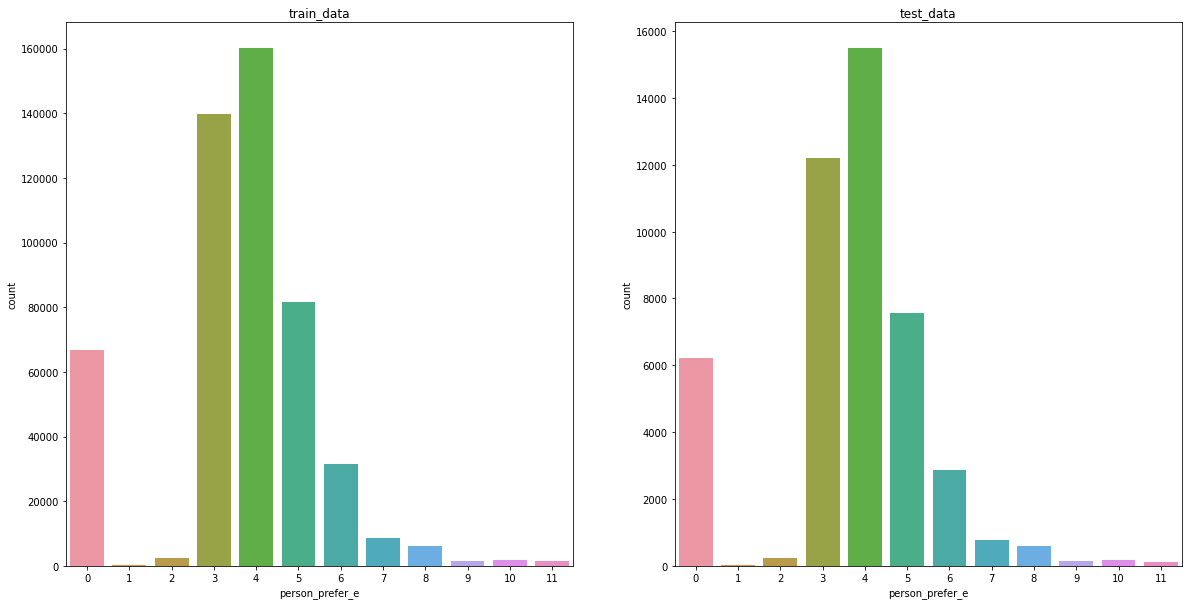

In [ ]:
# person_prefer_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_e'], ax = ax[0])
sns.countplot(test_data['person_prefer_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

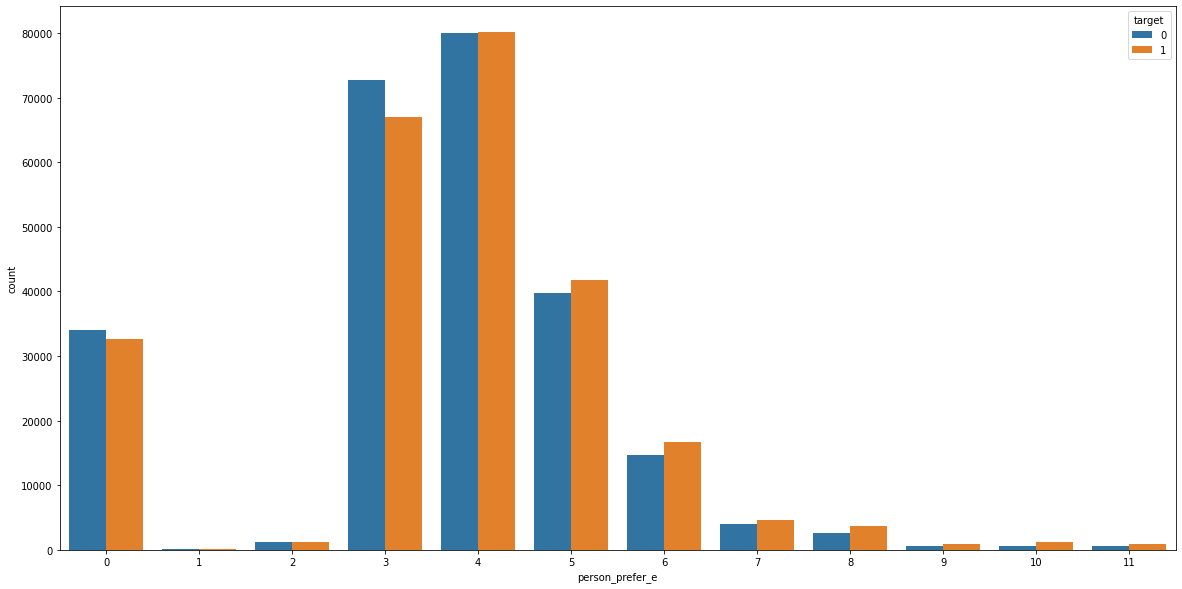

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_e', hue = 'target')


## 회원 선호 속성 F

의미가 크지 않을 거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

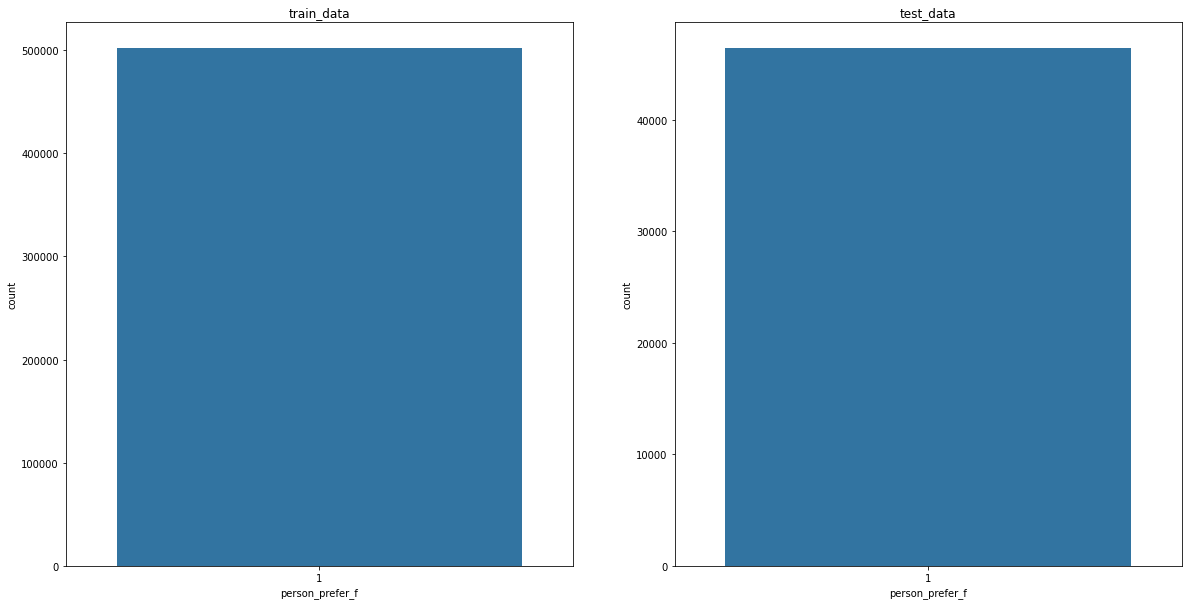

In [ ]:
# person_prefer_f
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_f'], ax = ax[0])
sns.countplot(test_data['person_prefer_f'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

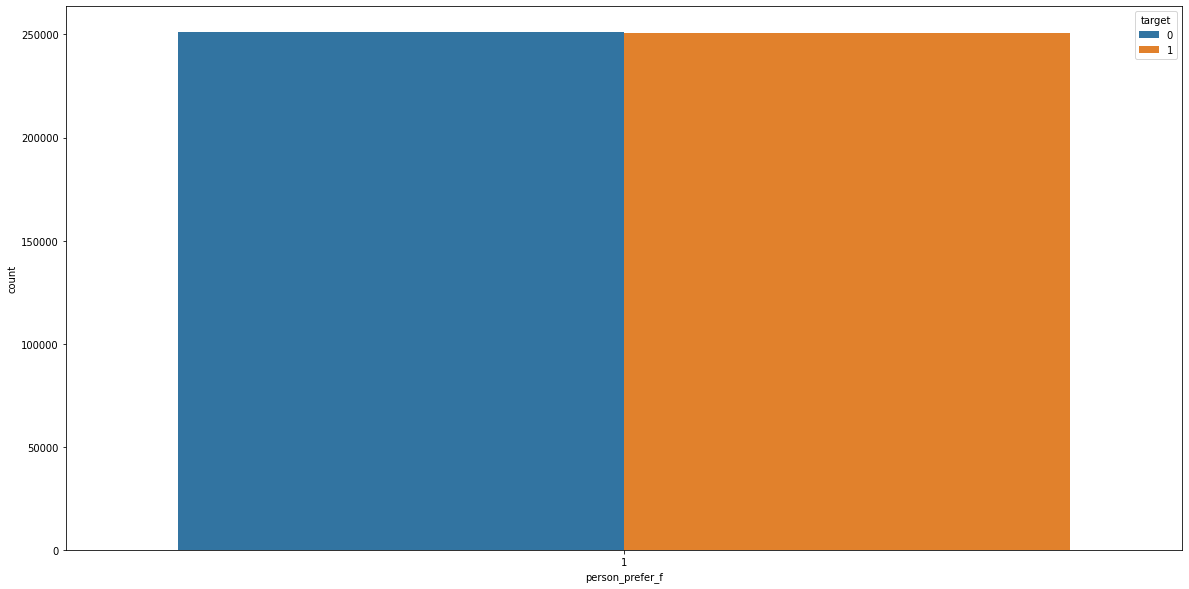

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_f', hue = 'target')

## 회원 선호 속성 G

의미가 크지 않을거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

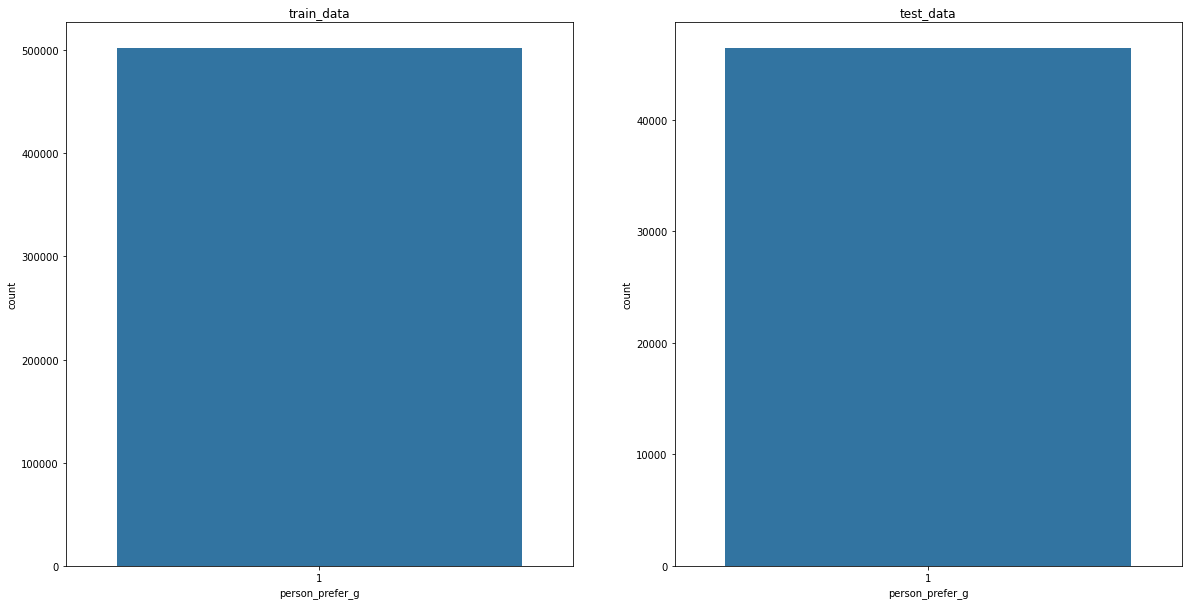

In [ ]:
# person_prefer_g
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_g'], ax = ax[0])
sns.countplot(test_data['person_prefer_g'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

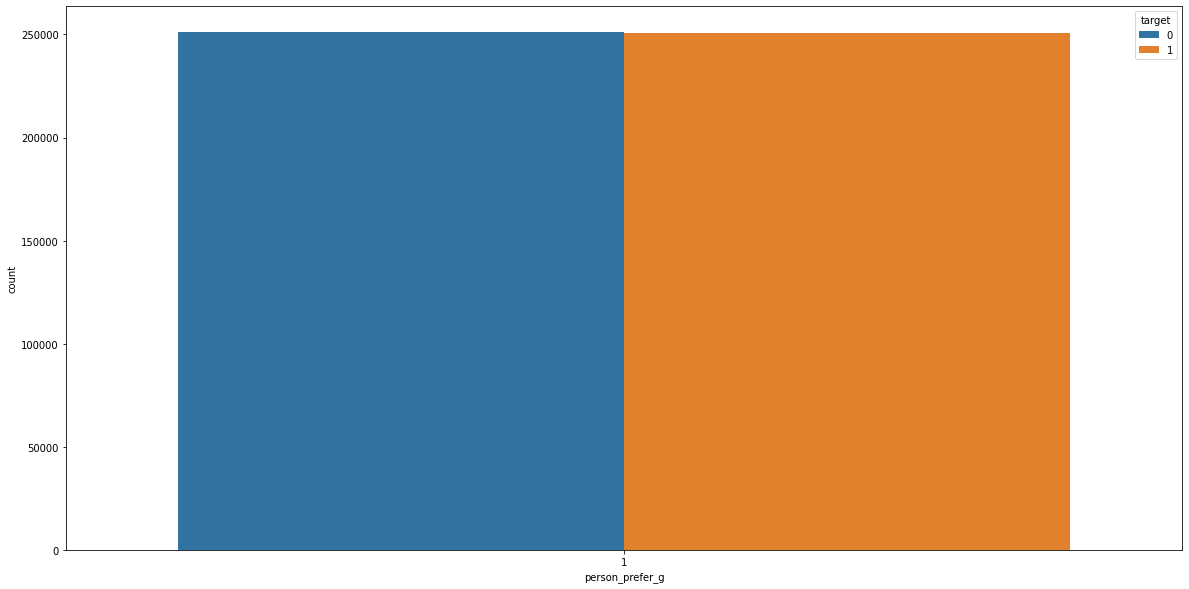

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_g', hue = 'target')

## 회원 선호 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

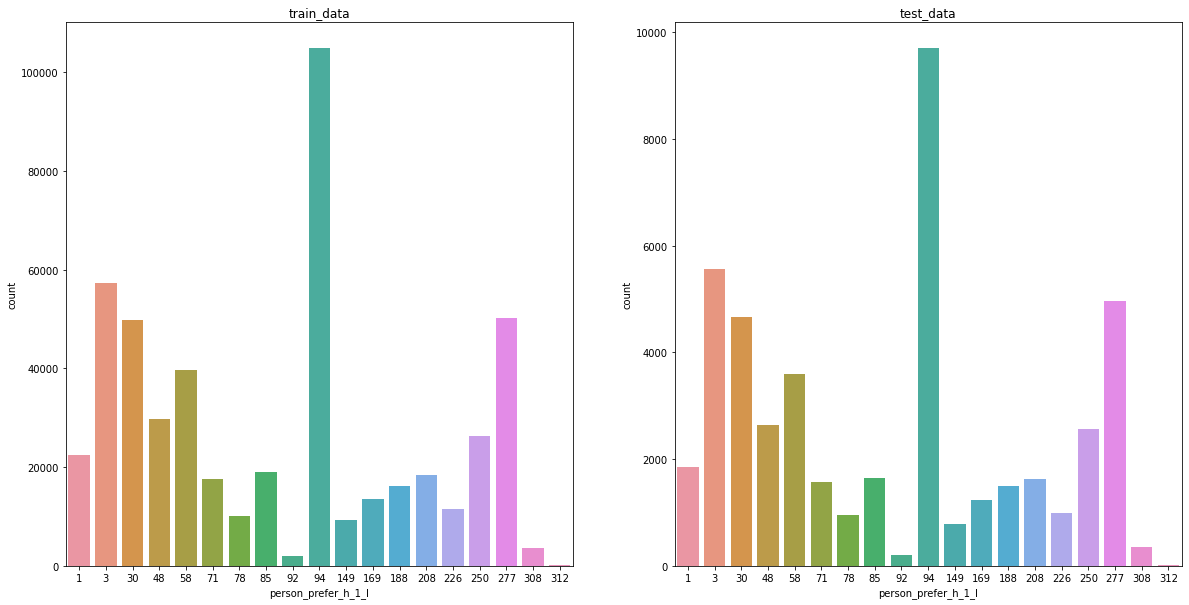

In [ ]:
# person_prefer_h_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

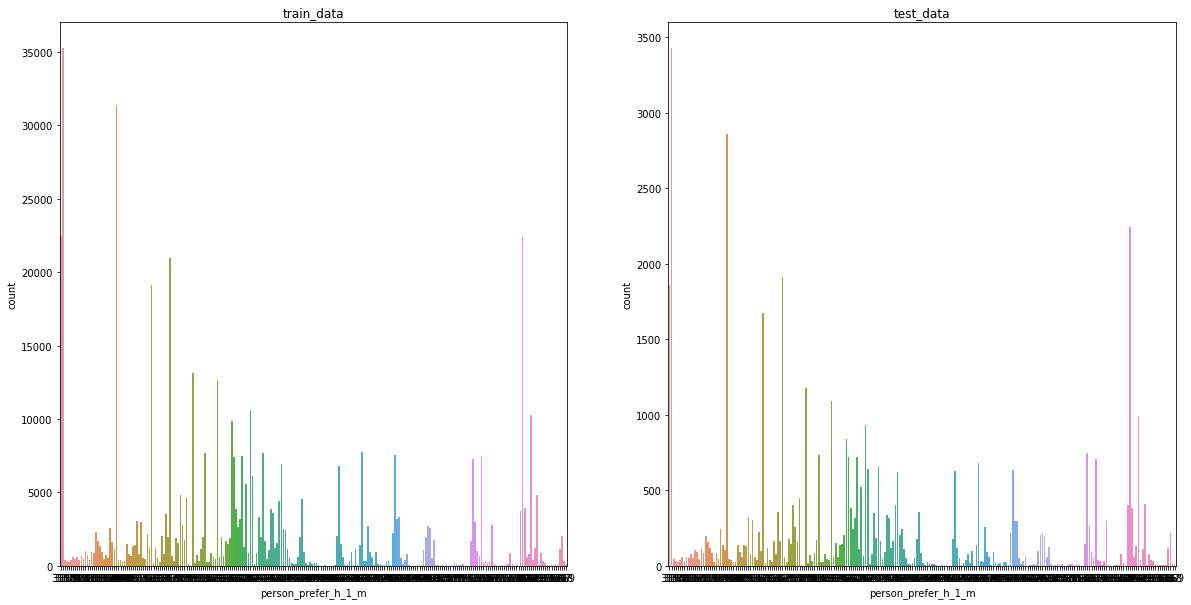

In [ ]:
# person_prefer_h_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

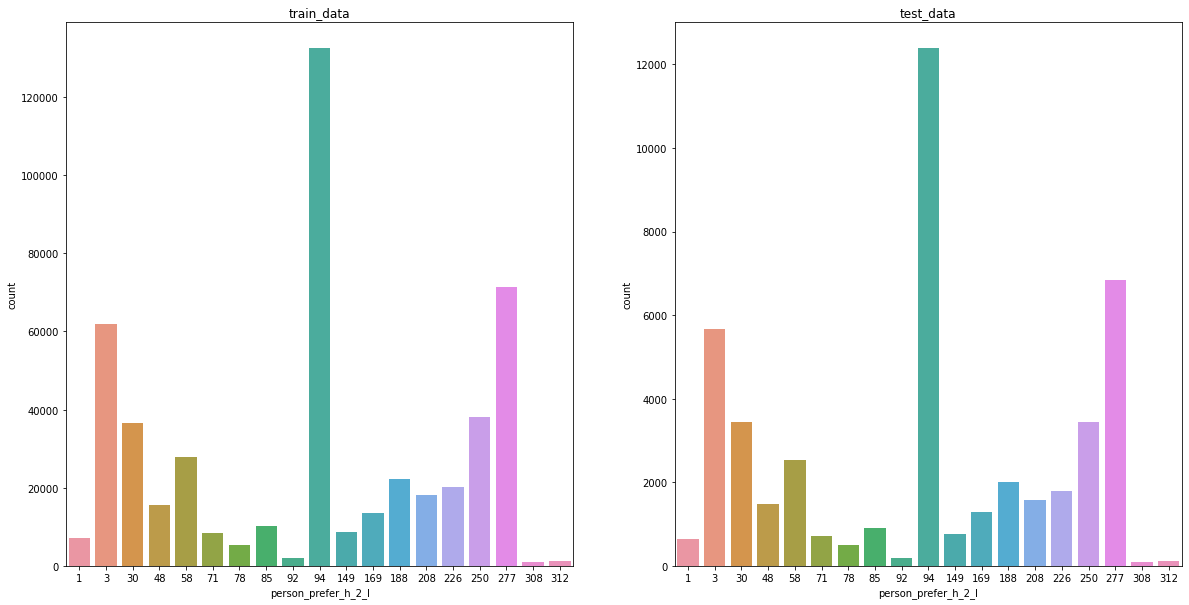

In [ ]:
# person_prefer_h_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

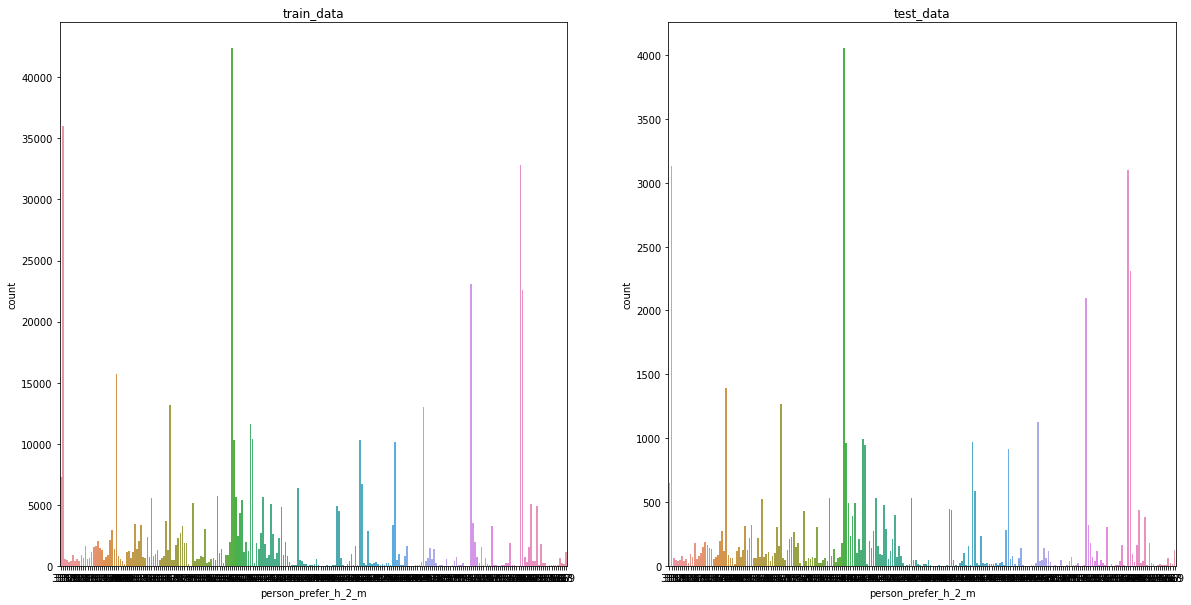

In [ ]:
# person_prefer_h_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

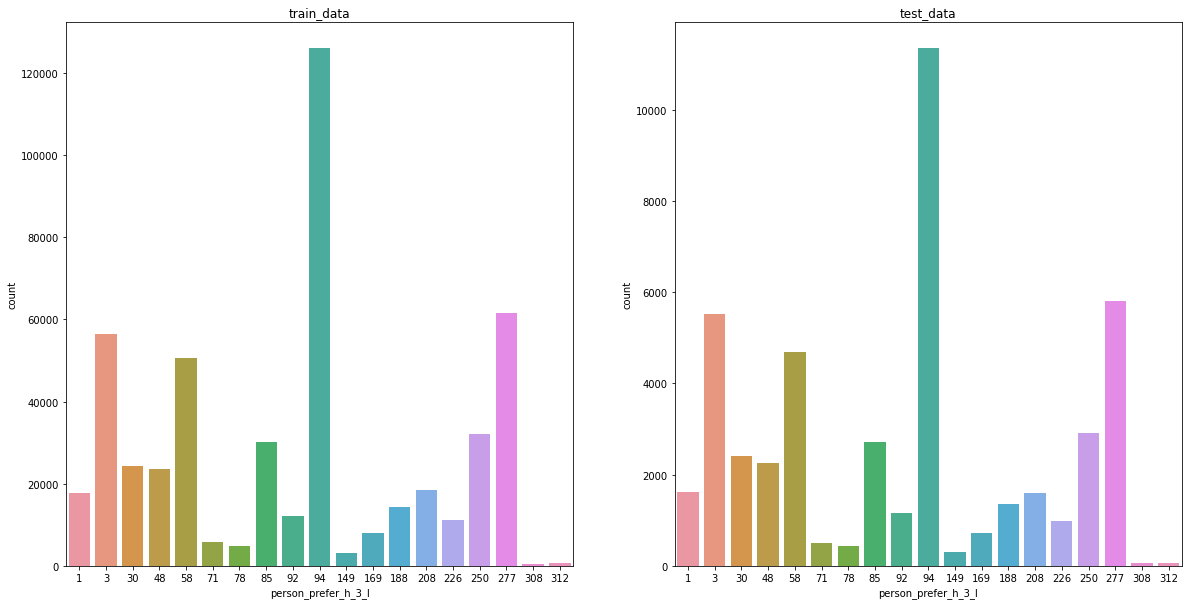

In [ ]:
# person_prefer_h_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

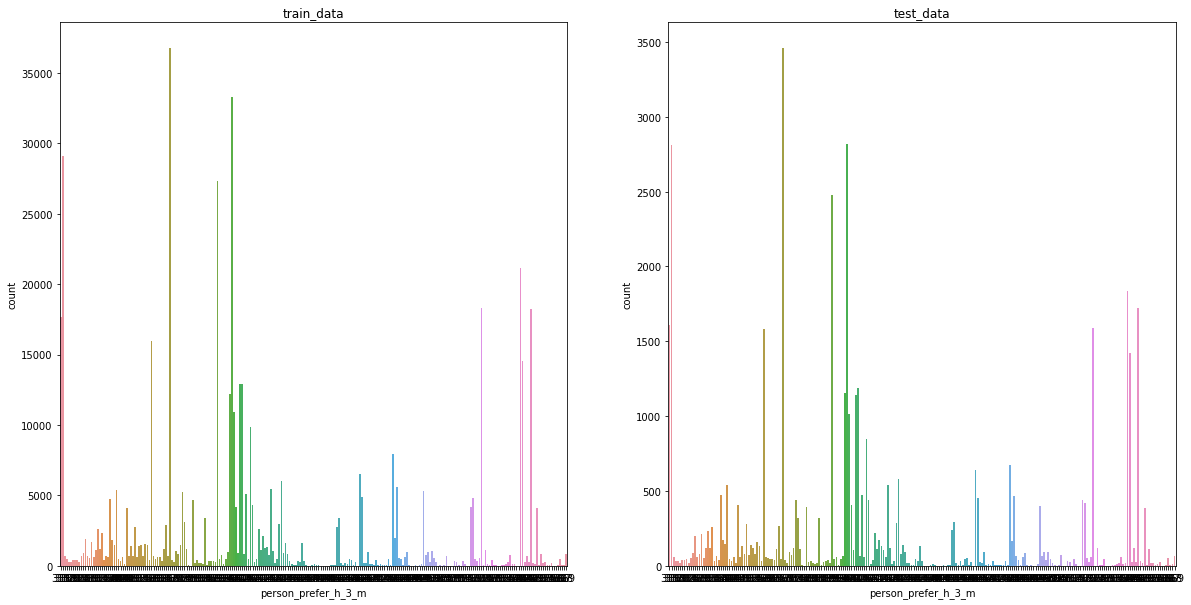

In [ ]:
# person_prefer_h_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

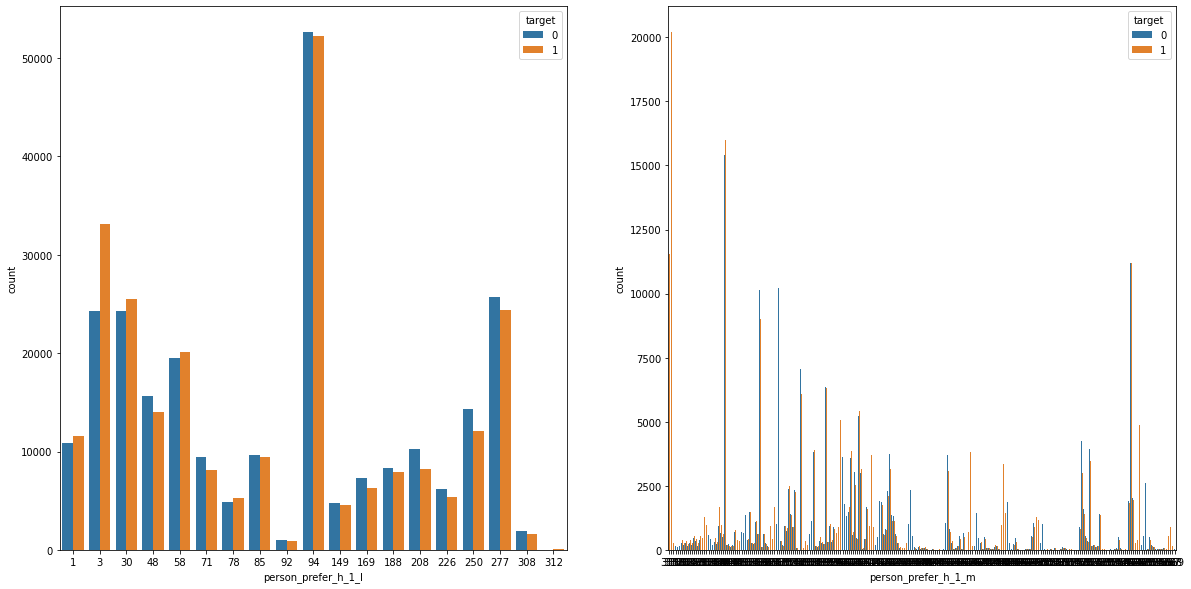

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_1_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_1_m', hue = 'target', ax = ax[1])

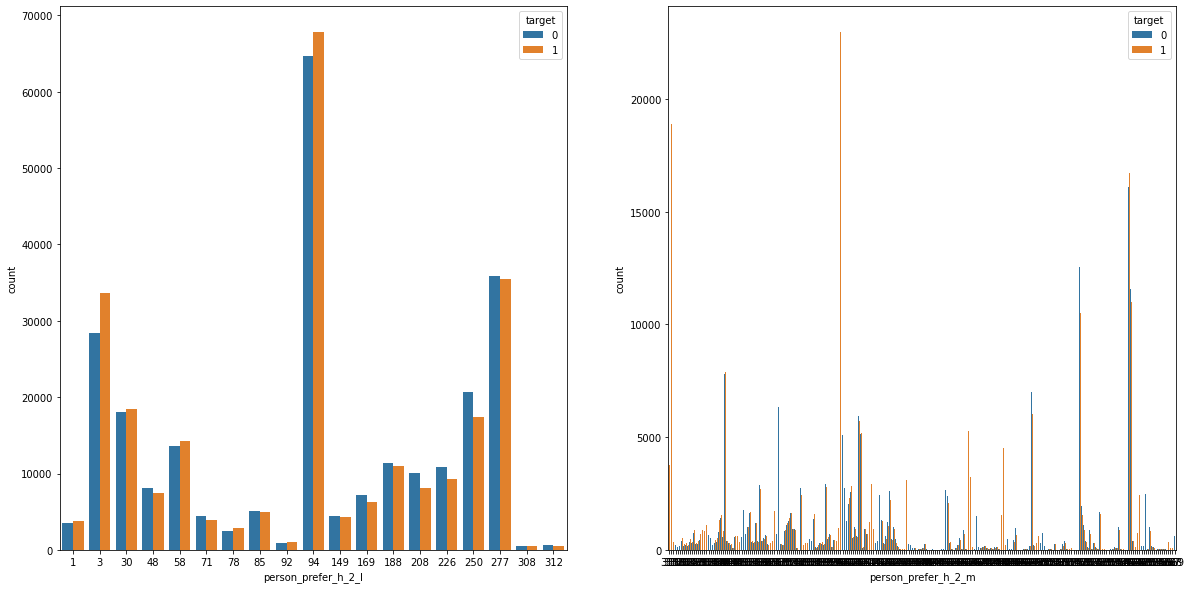

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_2_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_2_m', hue = 'target', ax = ax[1])

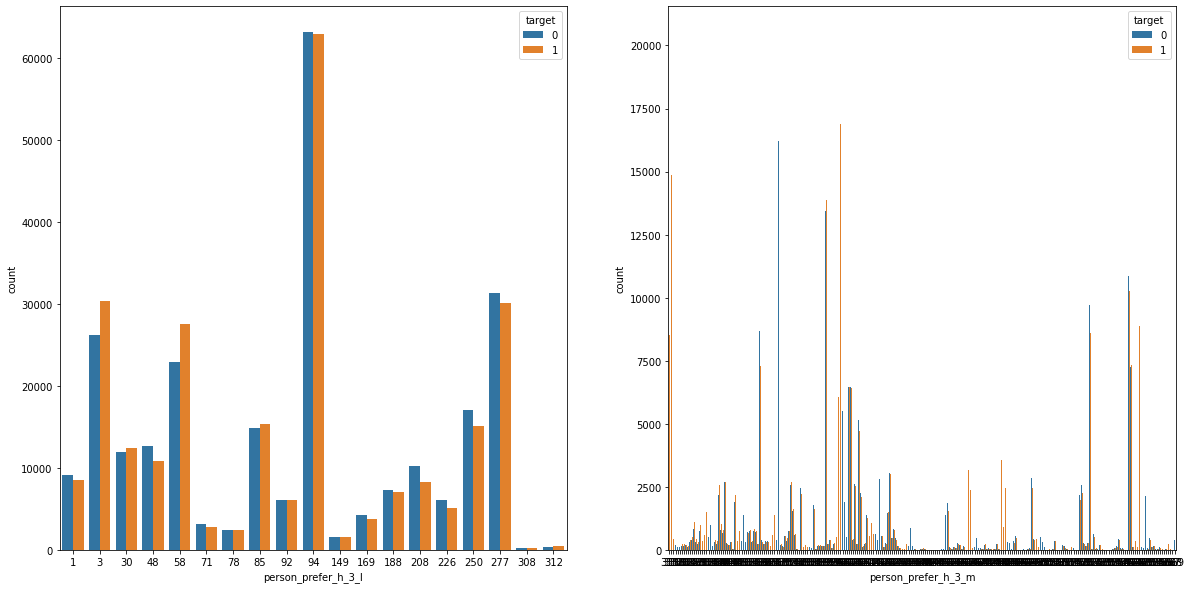

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_3_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_3_m', hue = 'target', ax = ax[1])

## 컨텐츠 속성 I

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

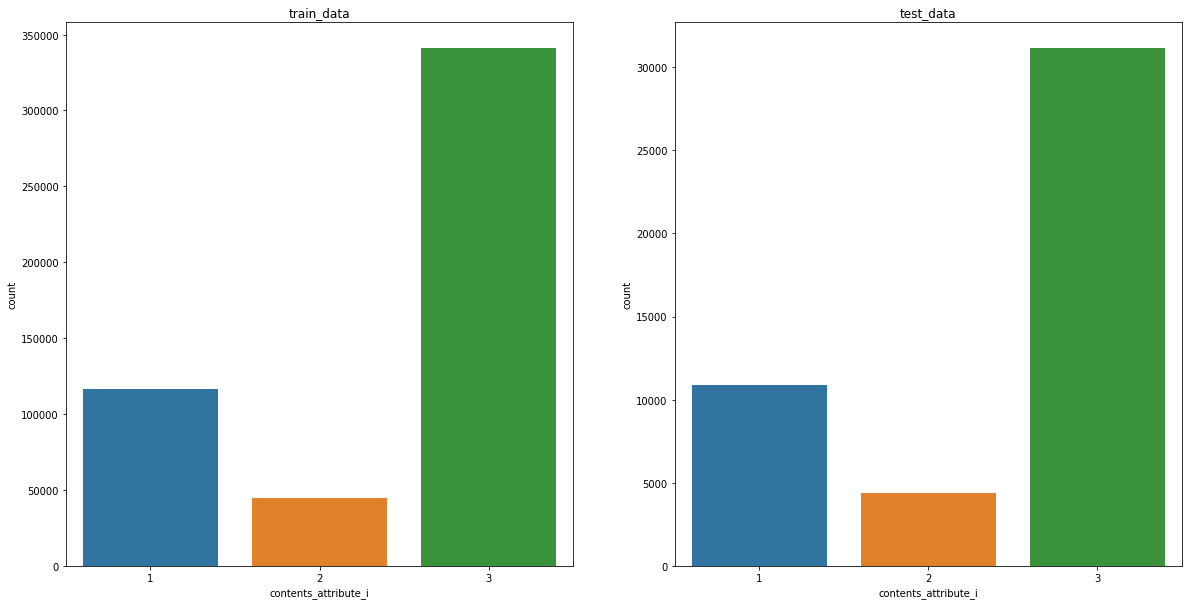

In [ ]:
# contents_attribute_i
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_i'], ax = ax[0])
sns.countplot(test_data['contents_attribute_i'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

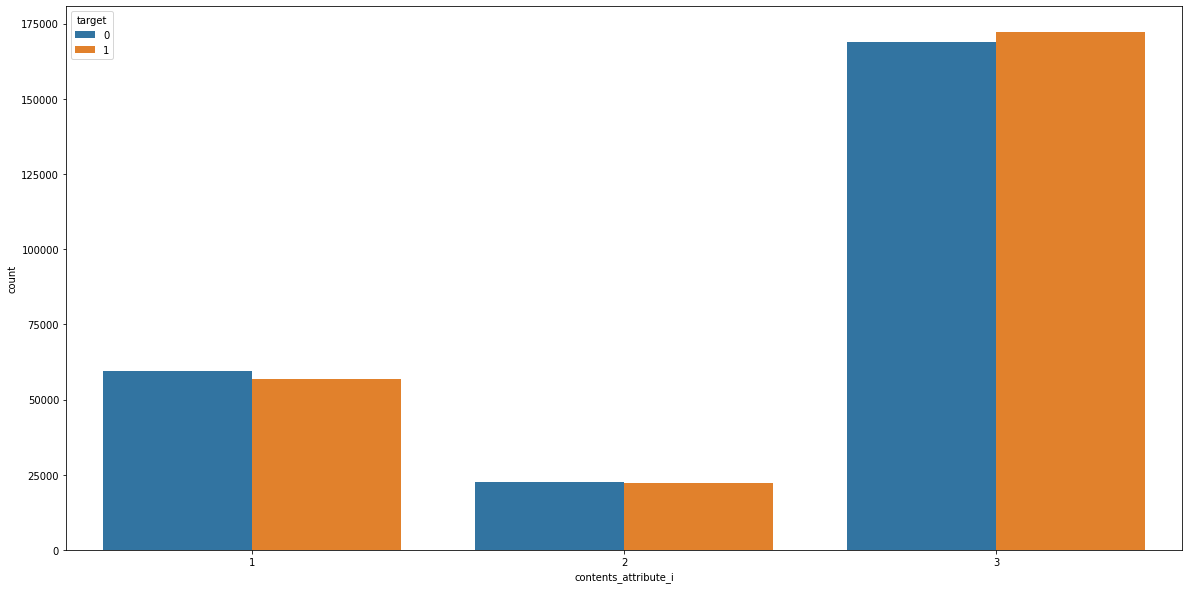

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_i', hue = 'target')

## 컨텐츠 속성 A

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

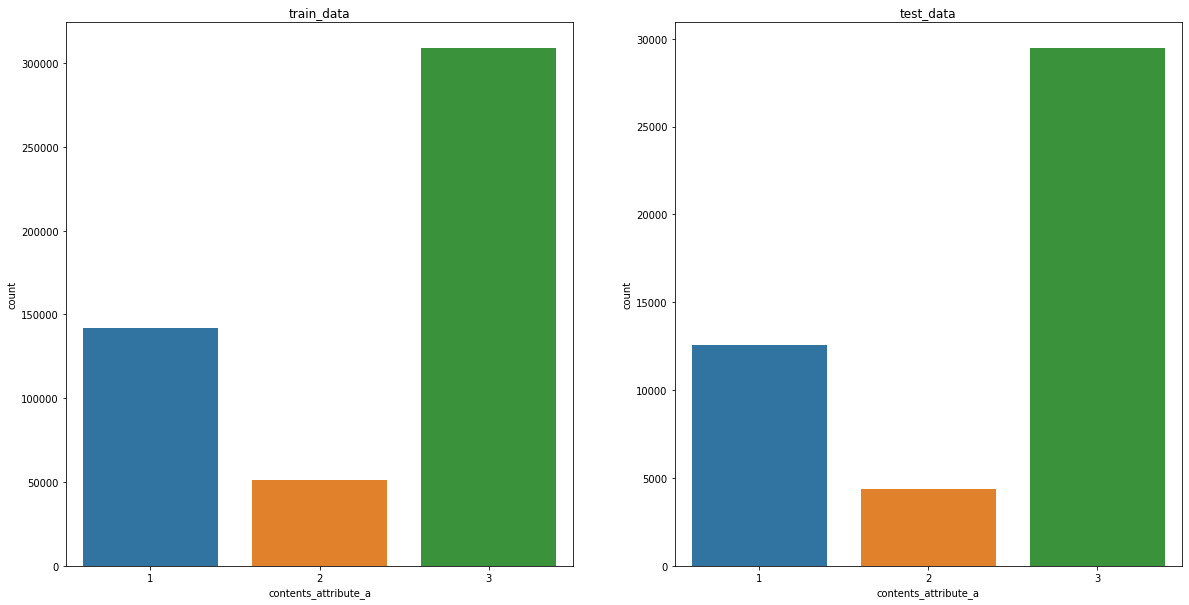

In [ ]:
# contents_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_a'], ax = ax[0])
sns.countplot(test_data['contents_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

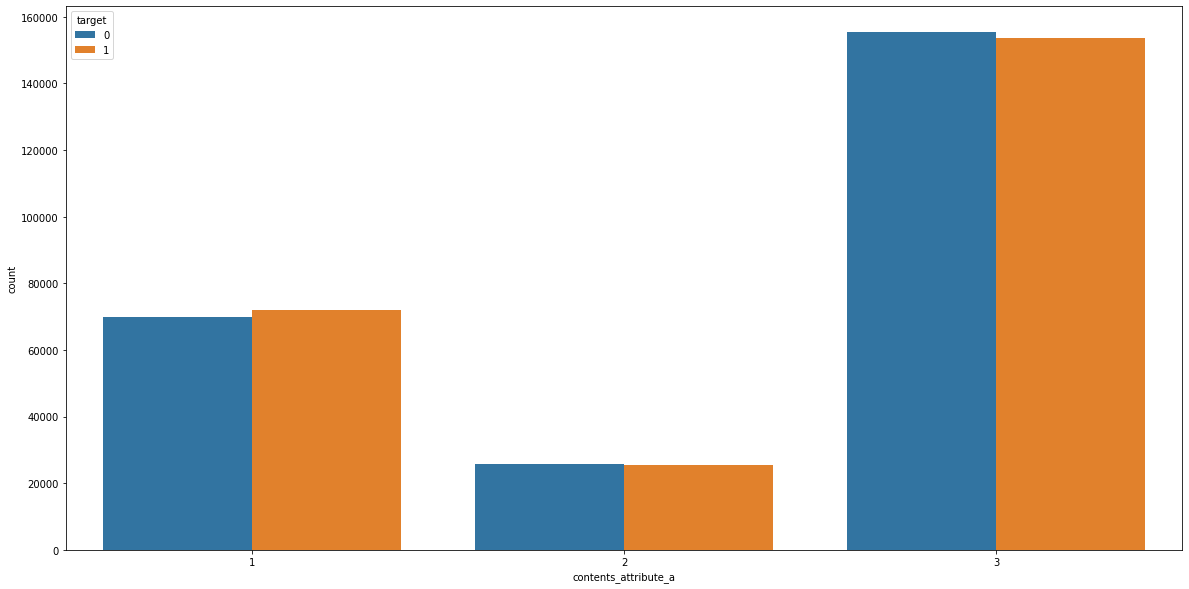

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_a', hue = 'target')

## 컨텐츠 속성 J

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

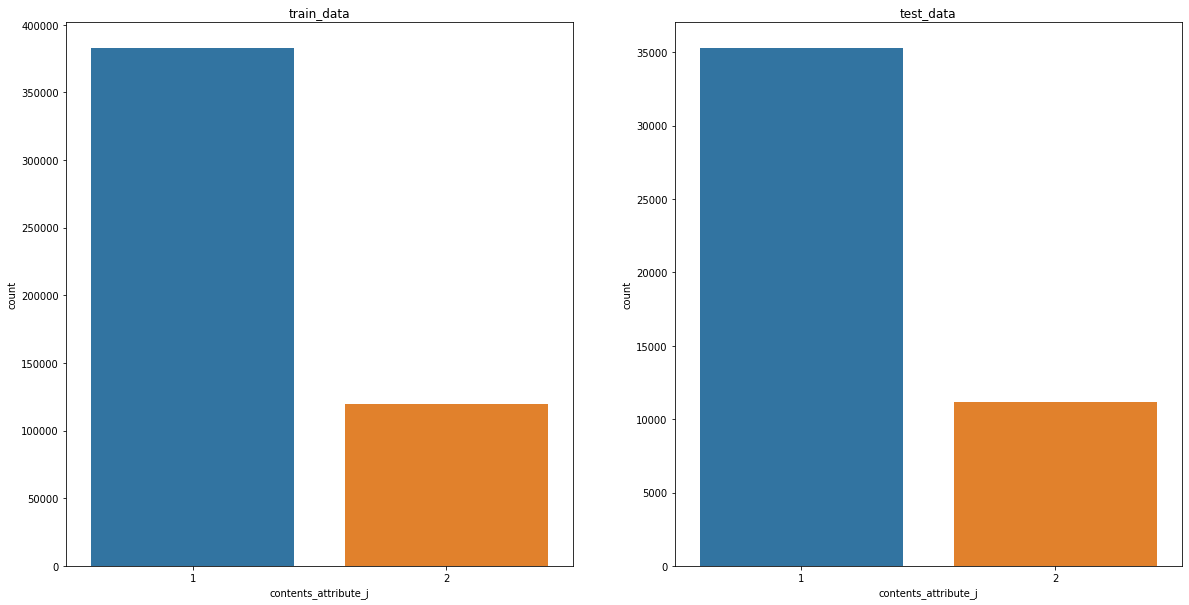

In [ ]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

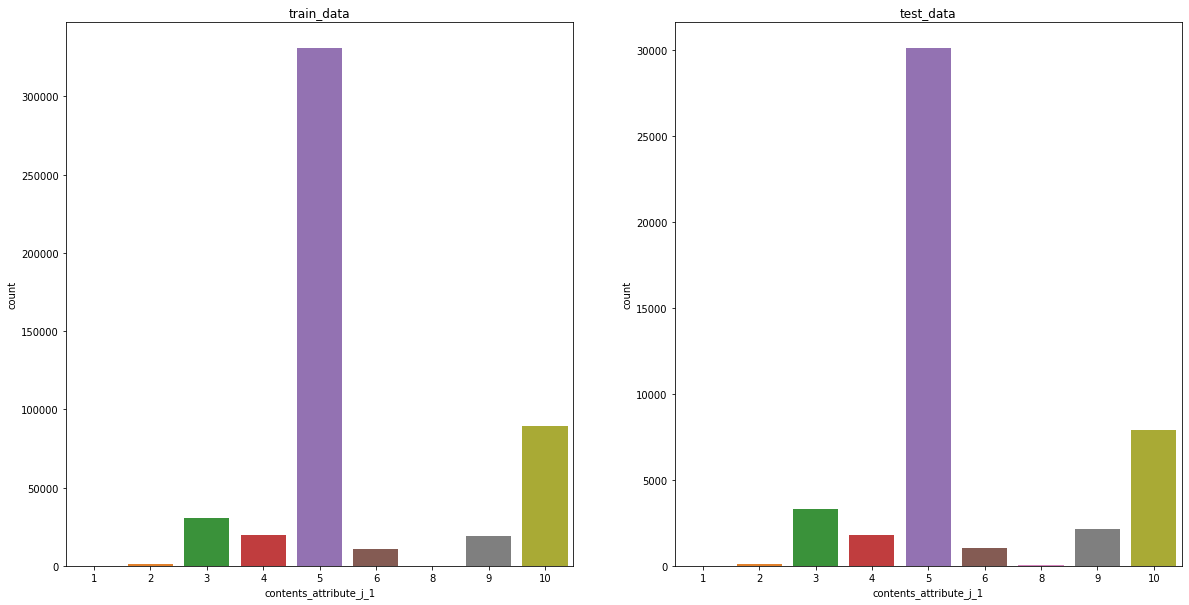

In [ ]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j_1'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

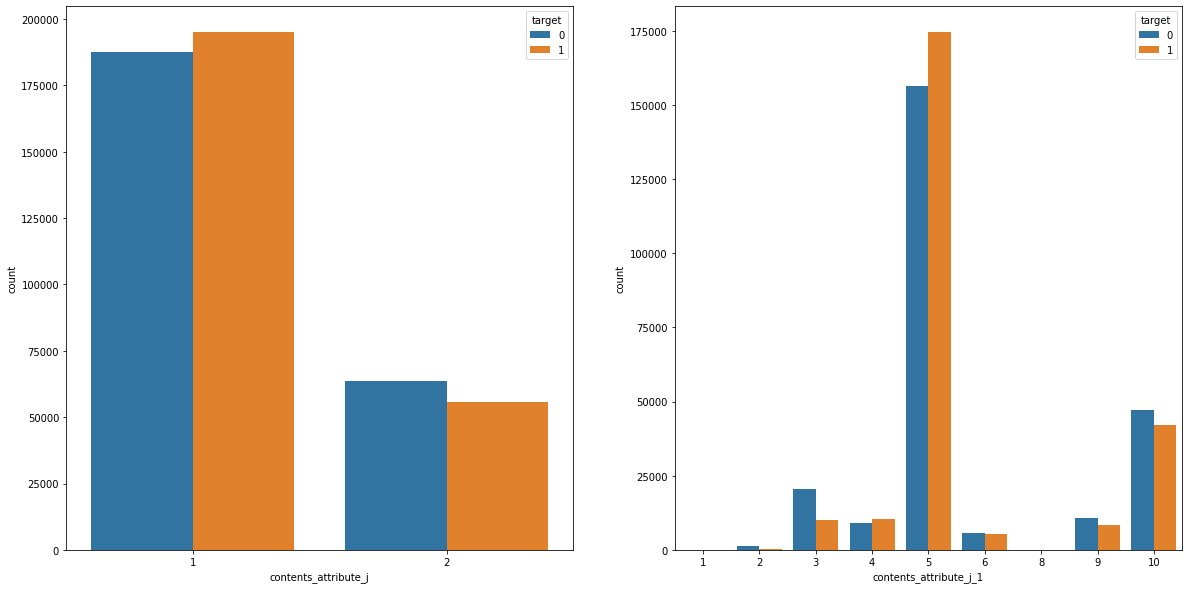

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_j', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_j_1', hue = 'target', ax = ax[1])

## 컨텐츠 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

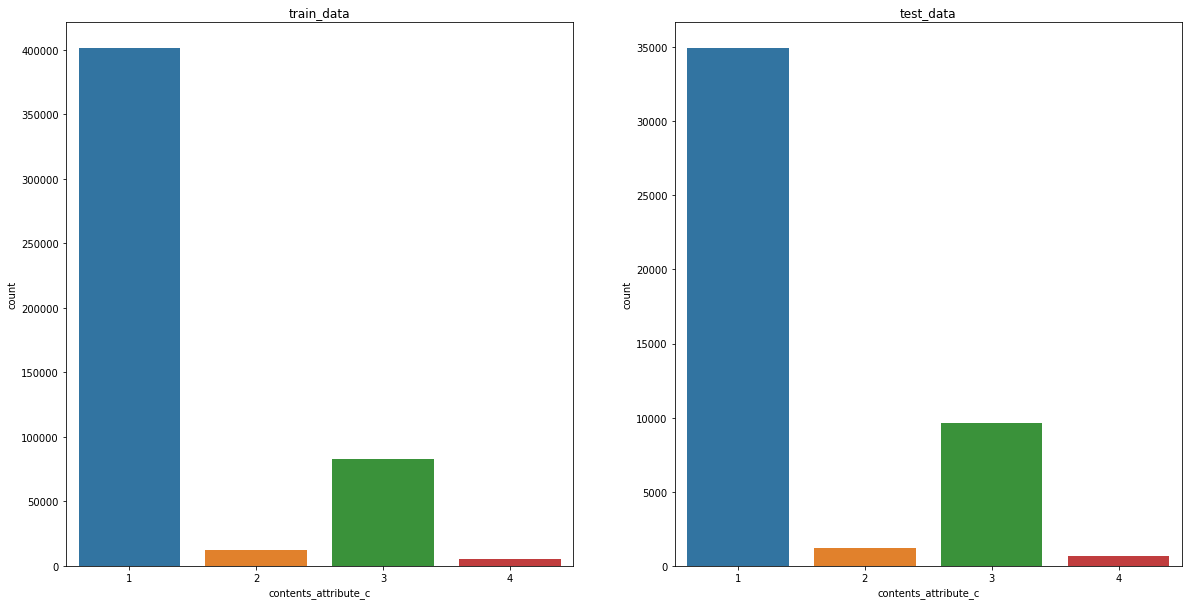

In [ ]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_c'], ax = ax[0])
sns.countplot(test_data['contents_attribute_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

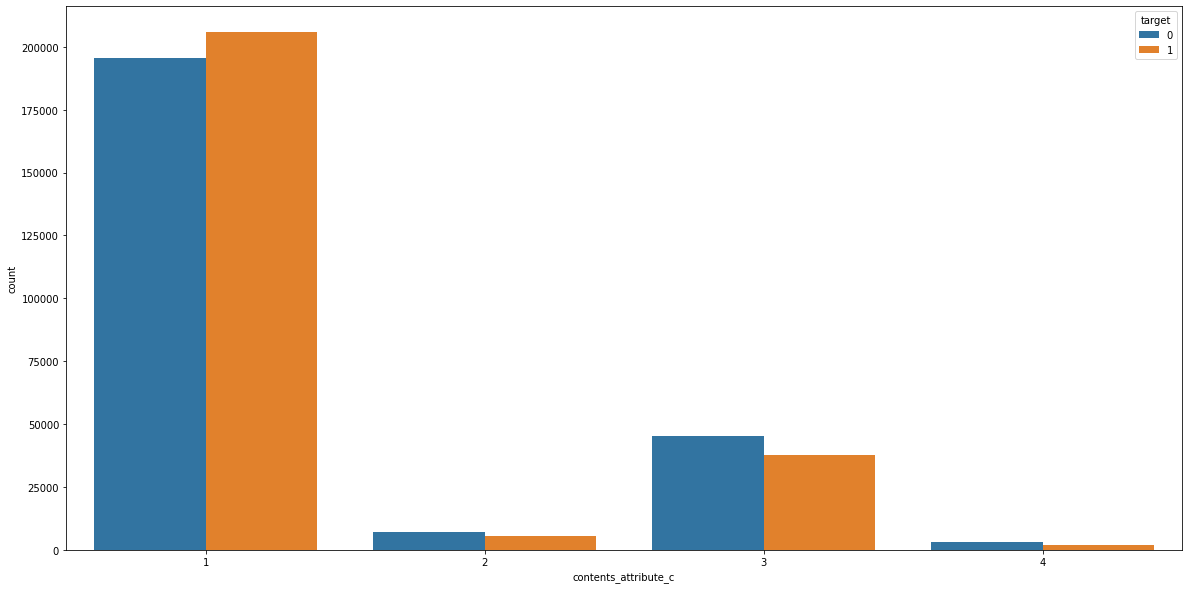

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_c', hue = 'target')


## 컨텐츠 속성 K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

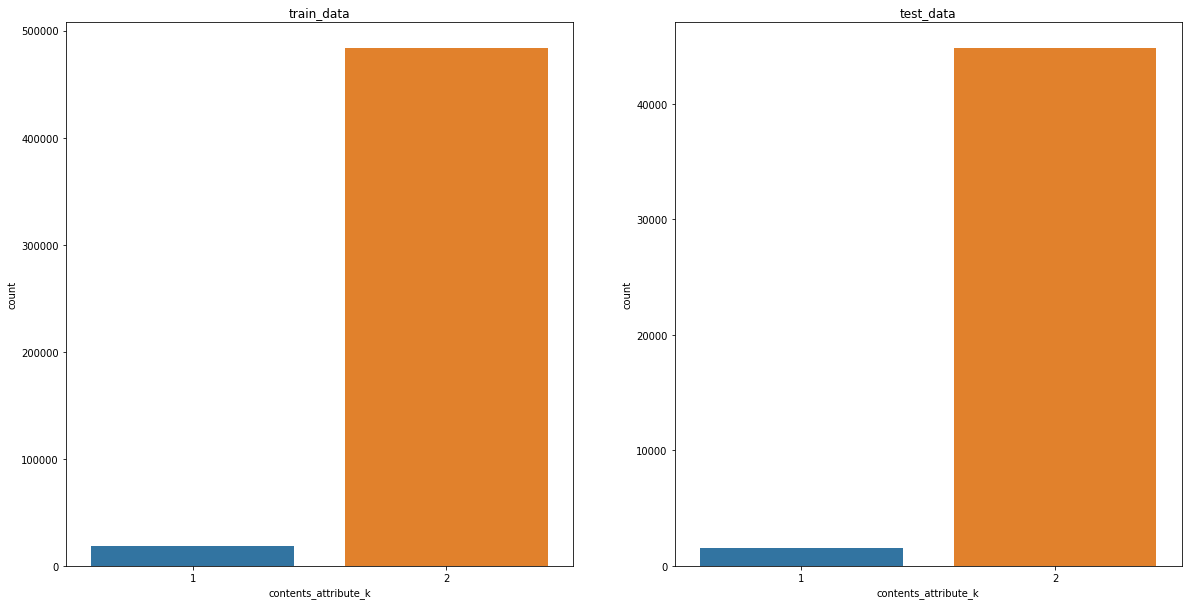

In [ ]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_k'], ax = ax[0])
sns.countplot(test_data['contents_attribute_k'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

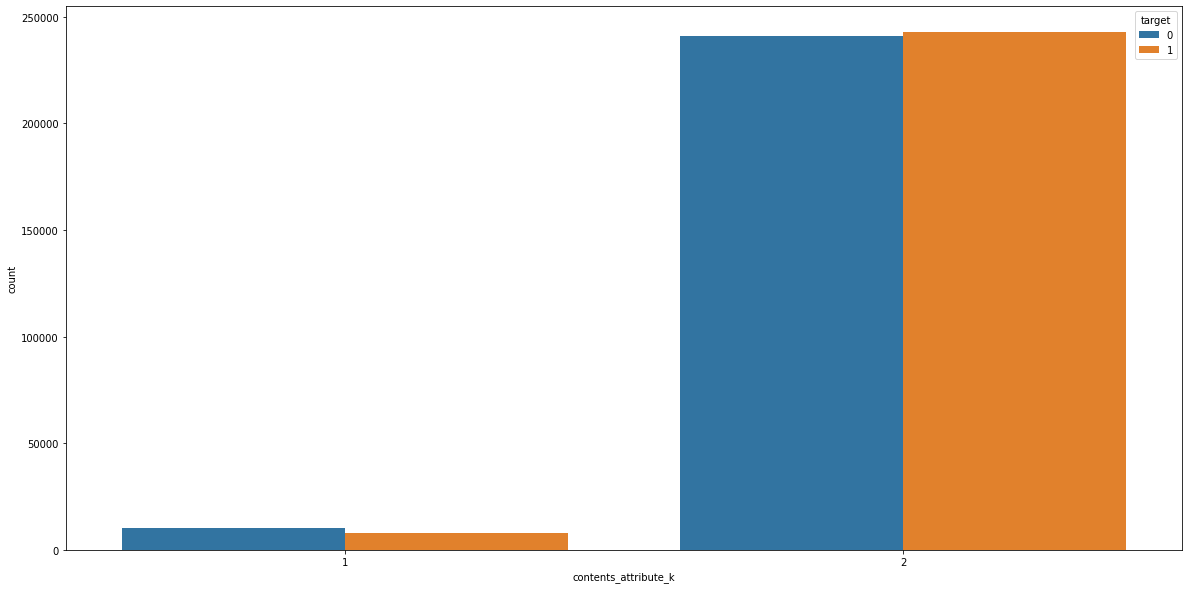

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_k', hue = 'target')

##컨텐츠 속성 L

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

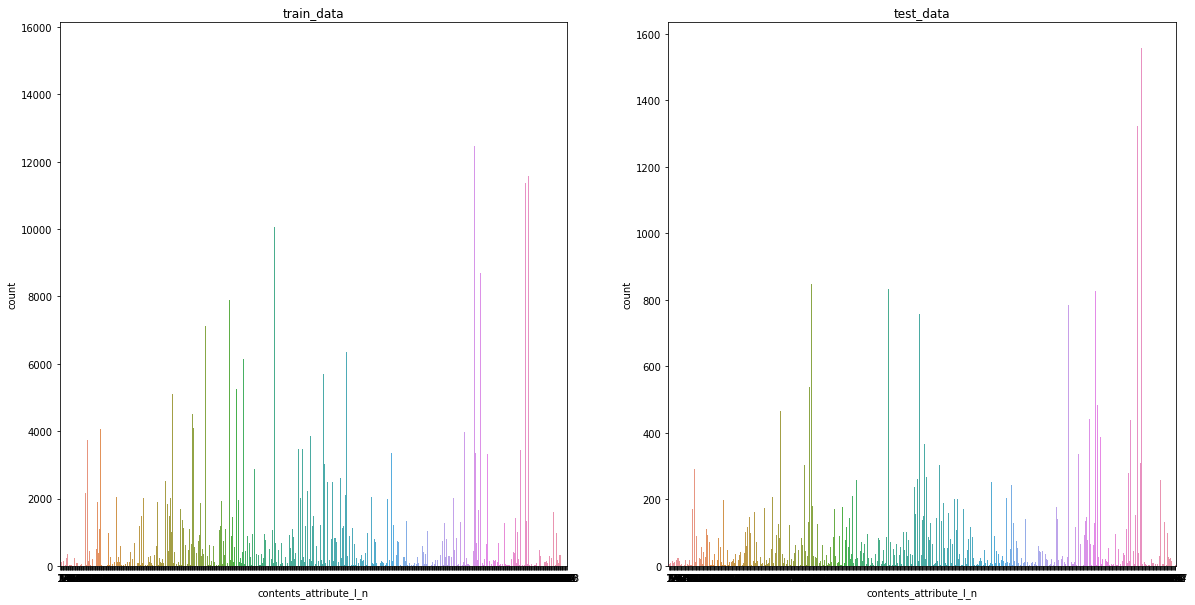

In [ ]:
# contents_attribute_l_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

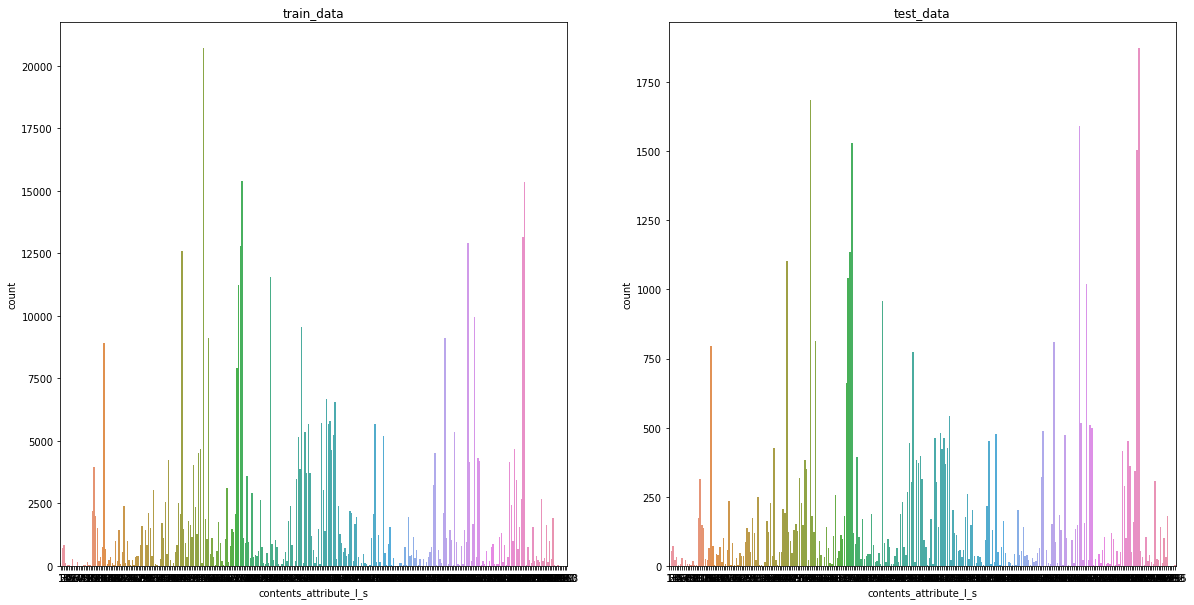

In [ ]:
# contents_attribute_l_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

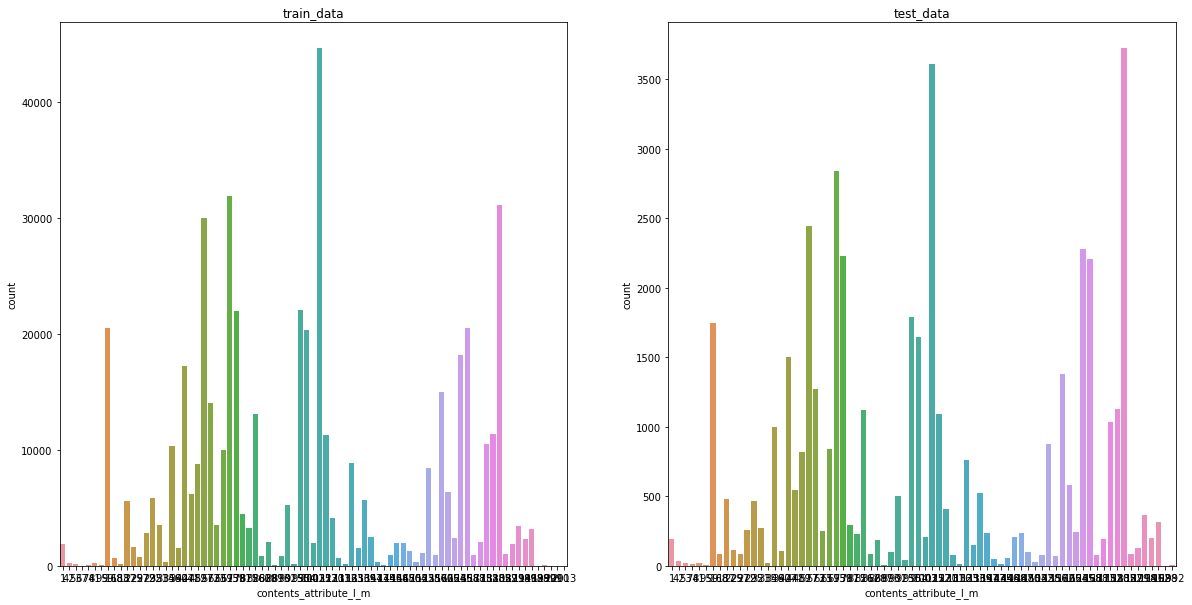

In [ ]:
# contents_attribute_l_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

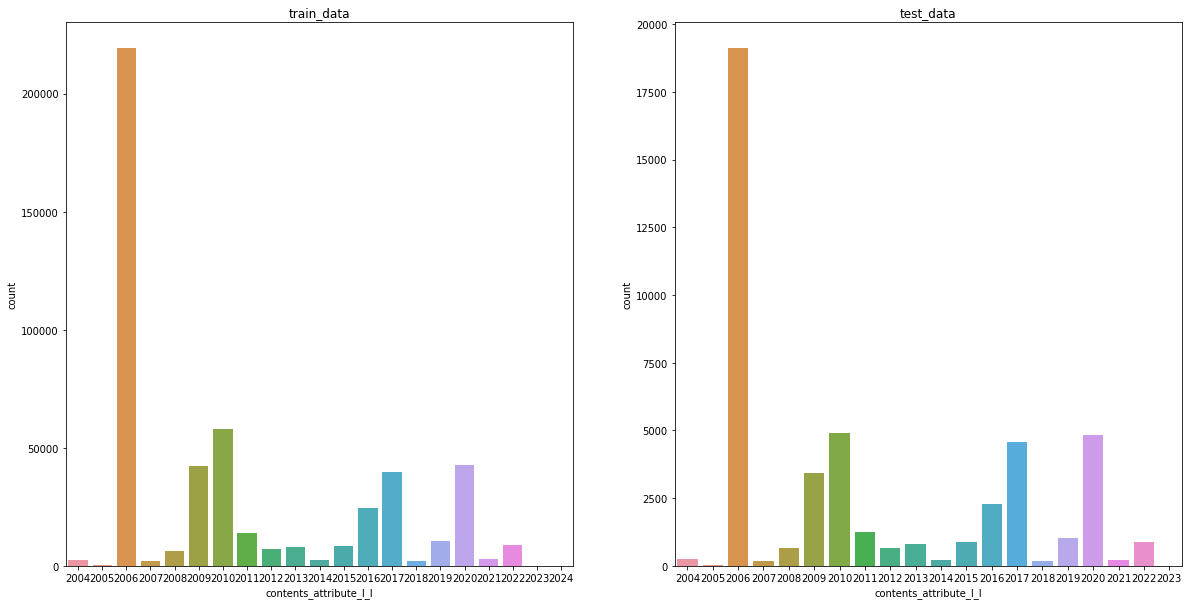

In [ ]:
# contents_attribute_l_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

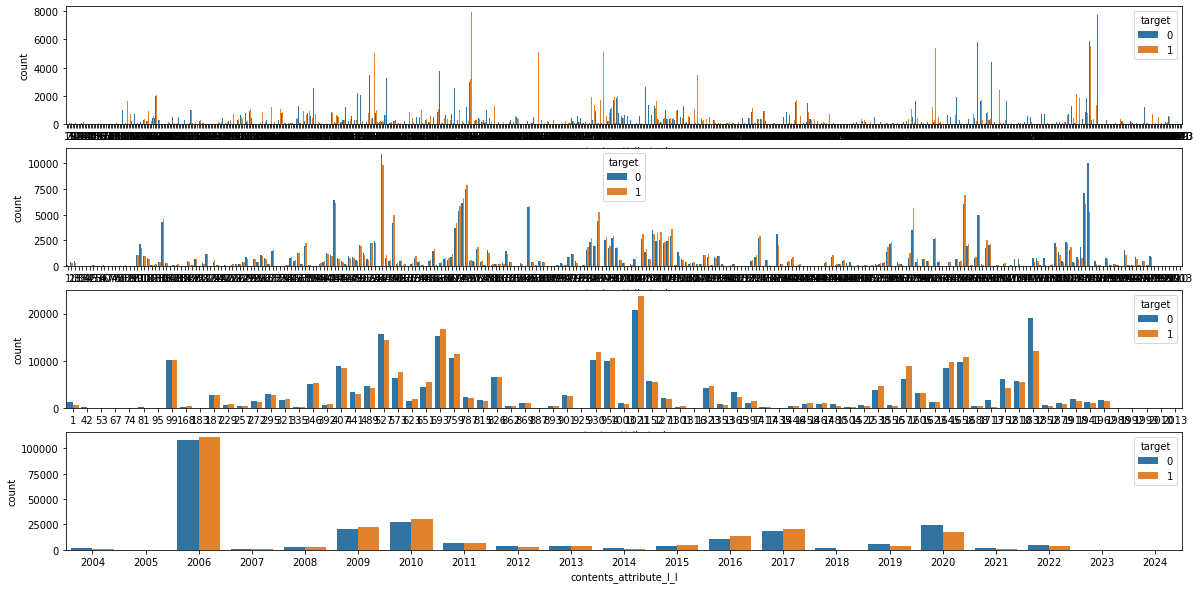

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_l_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_l_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_l_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_l_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 D

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

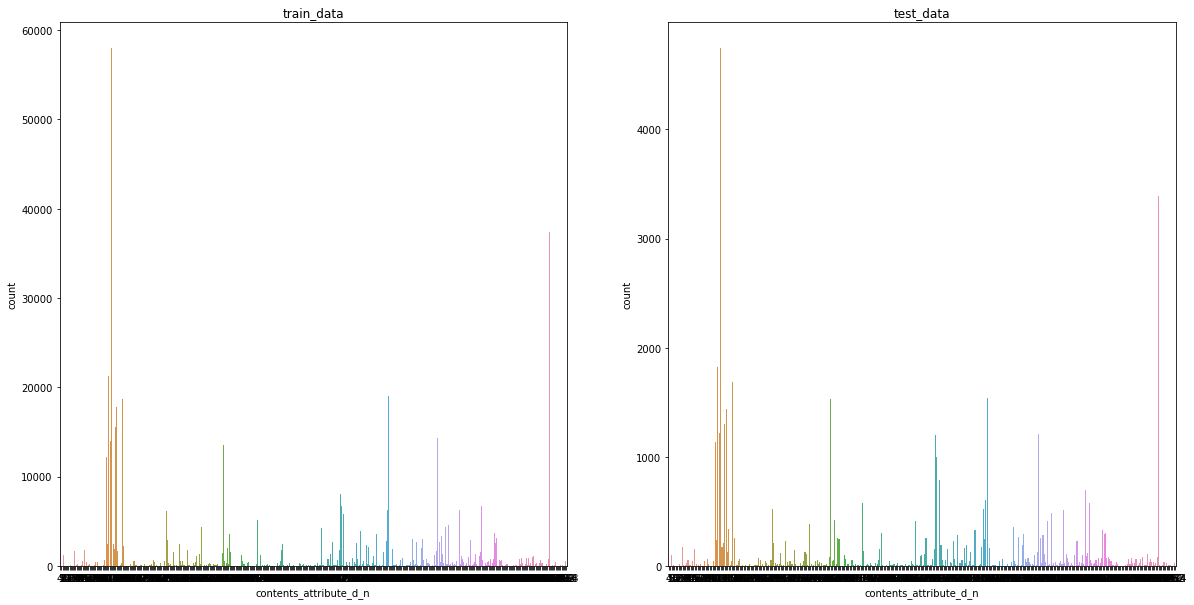

In [ ]:
# contents_attribute_d_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

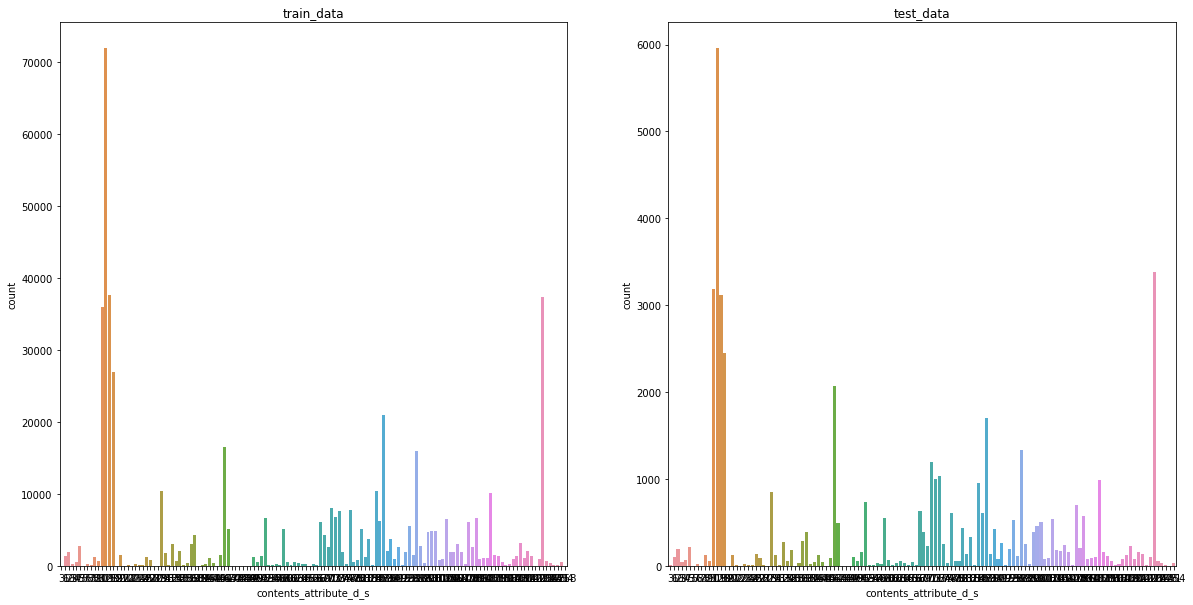

In [ ]:
# contents_attribute_d_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

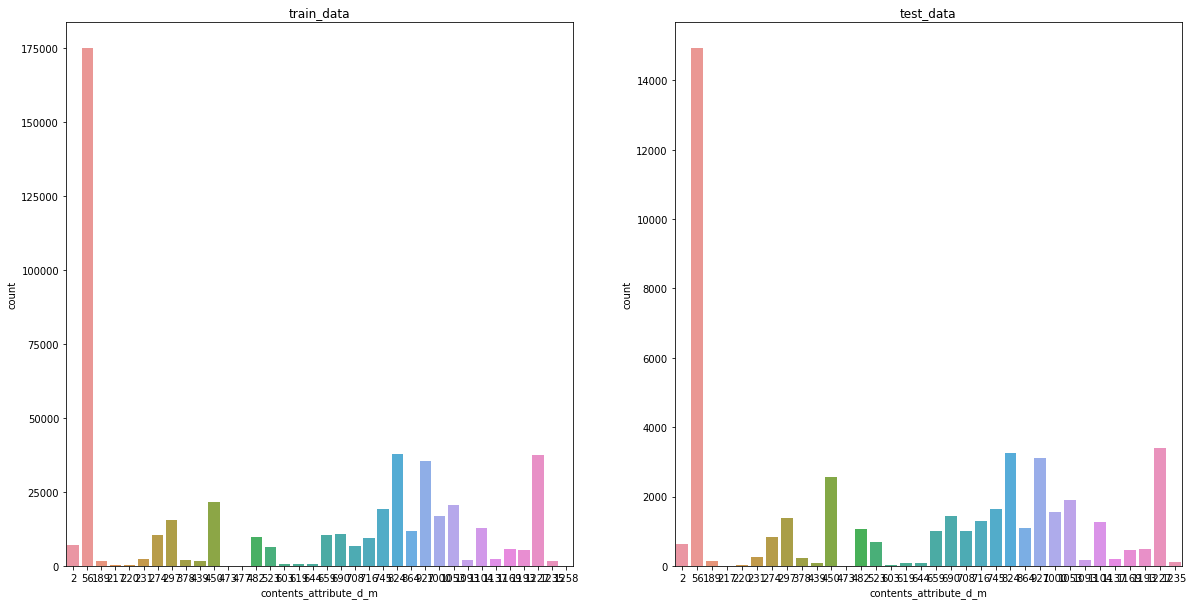

In [ ]:
# contents_attribute_d_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

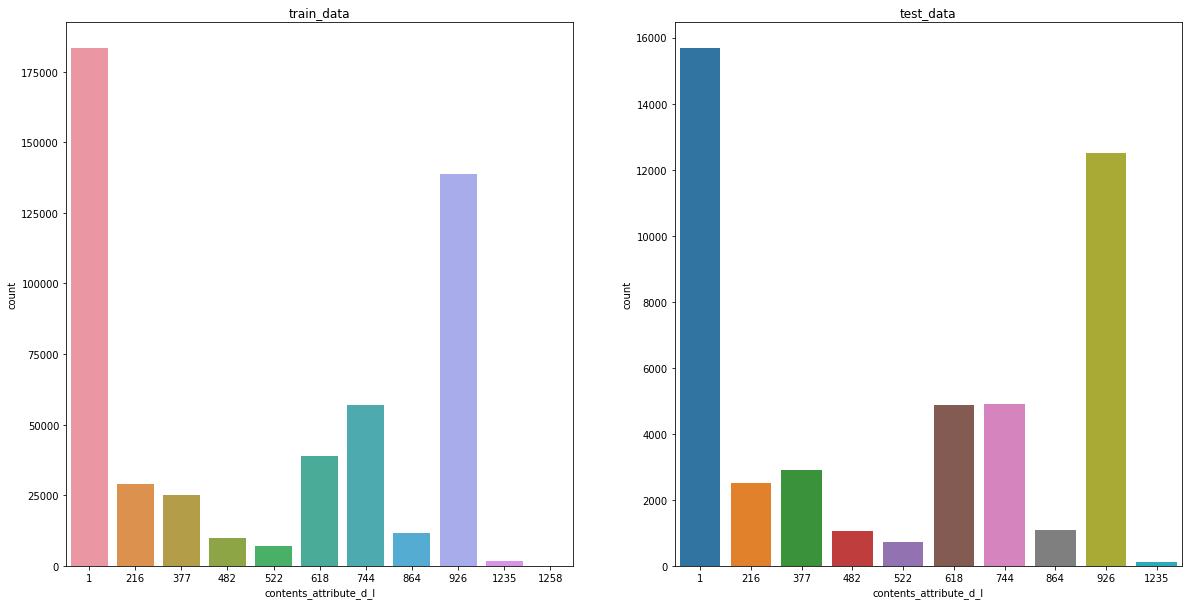

In [ ]:
# contents_attribute_d_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

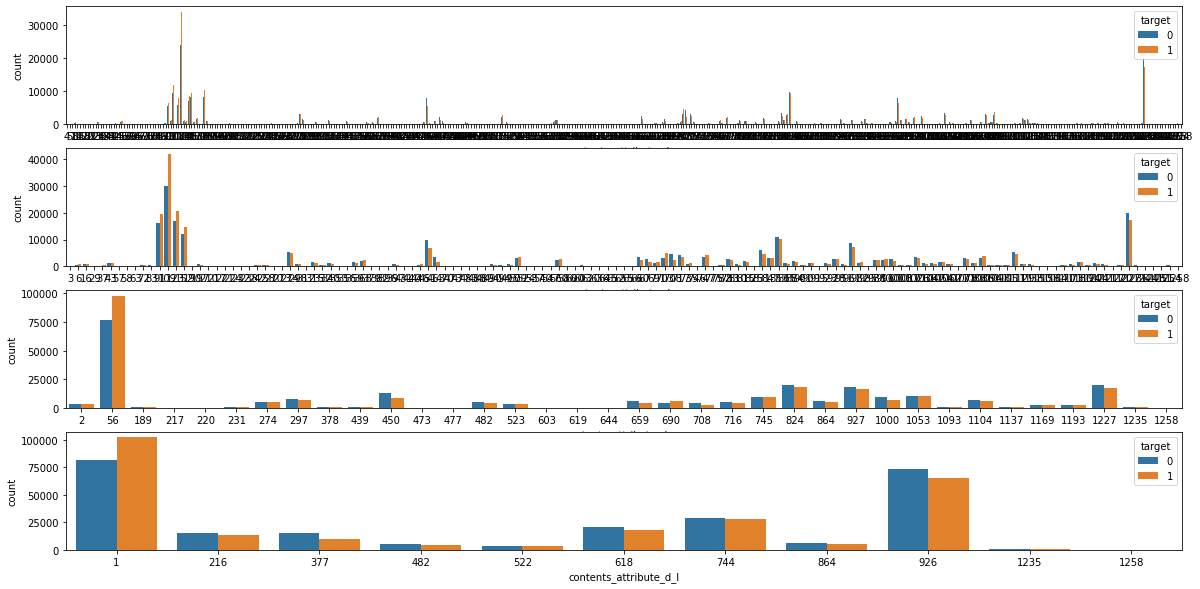

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_d_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_d_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_d_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_d_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 M

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

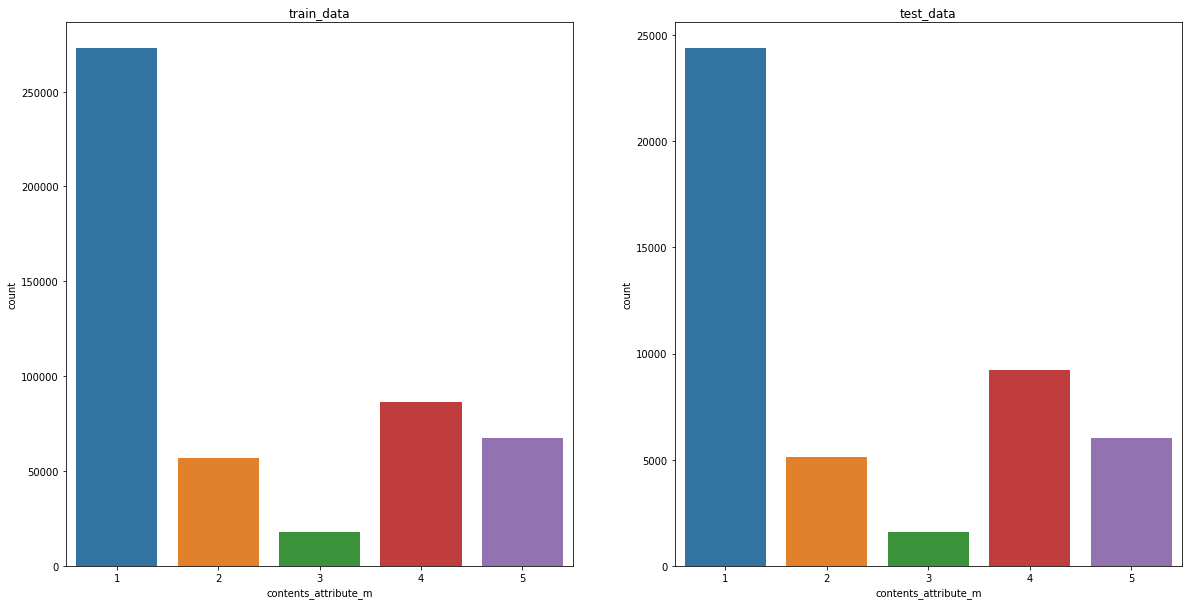

In [ ]:
# contents_attribute_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

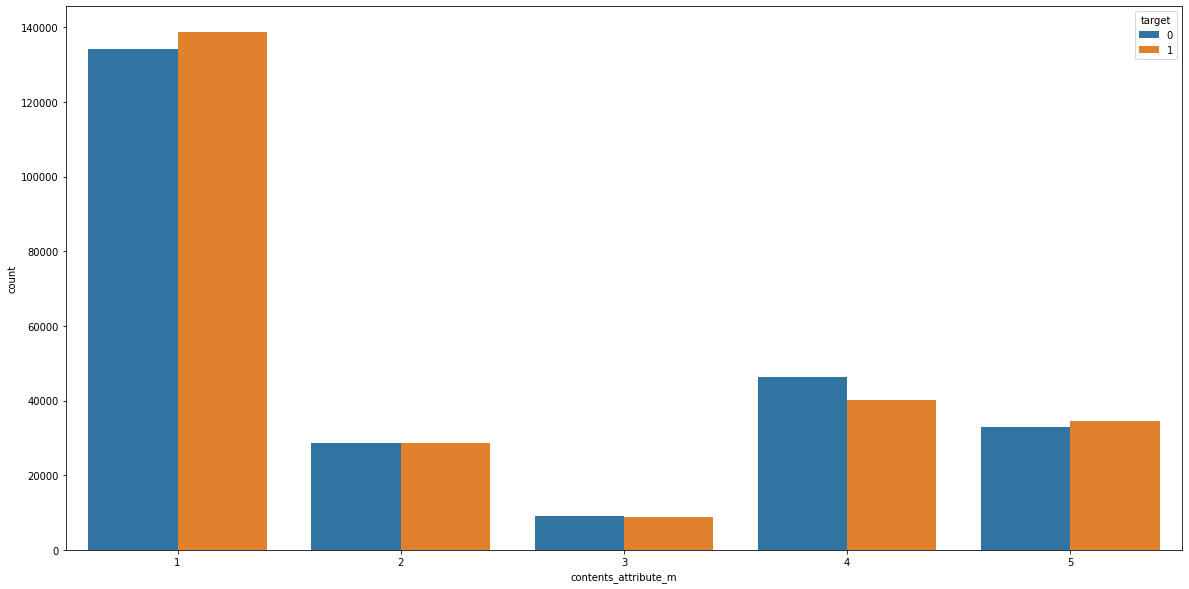

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_m', hue = 'target')

## 컨텐츠 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

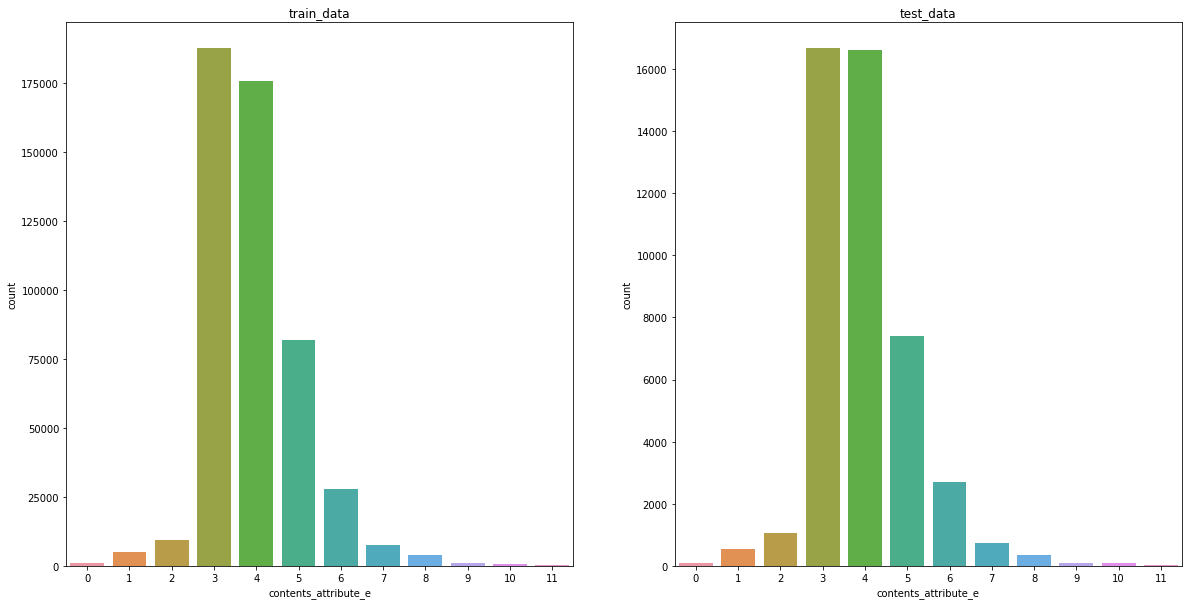

In [ ]:
# contents_attribute_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_e'], ax = ax[0])
sns.countplot(test_data['contents_attribute_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

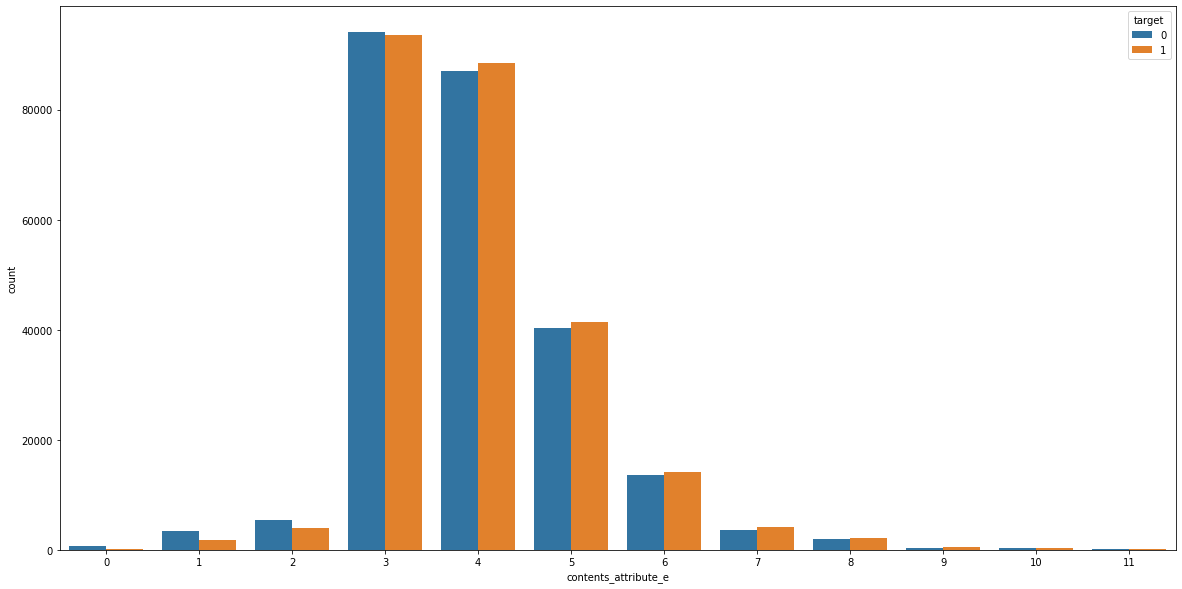

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_e', hue = 'target')

## 컨텐츠 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

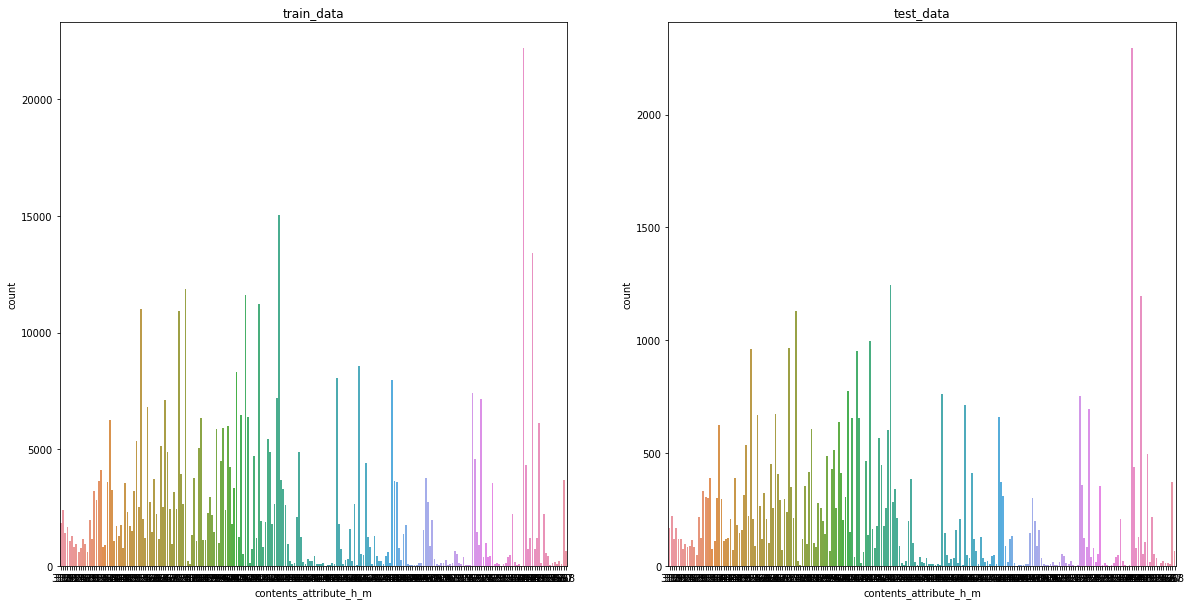

In [ ]:
# contents_attribute_h_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

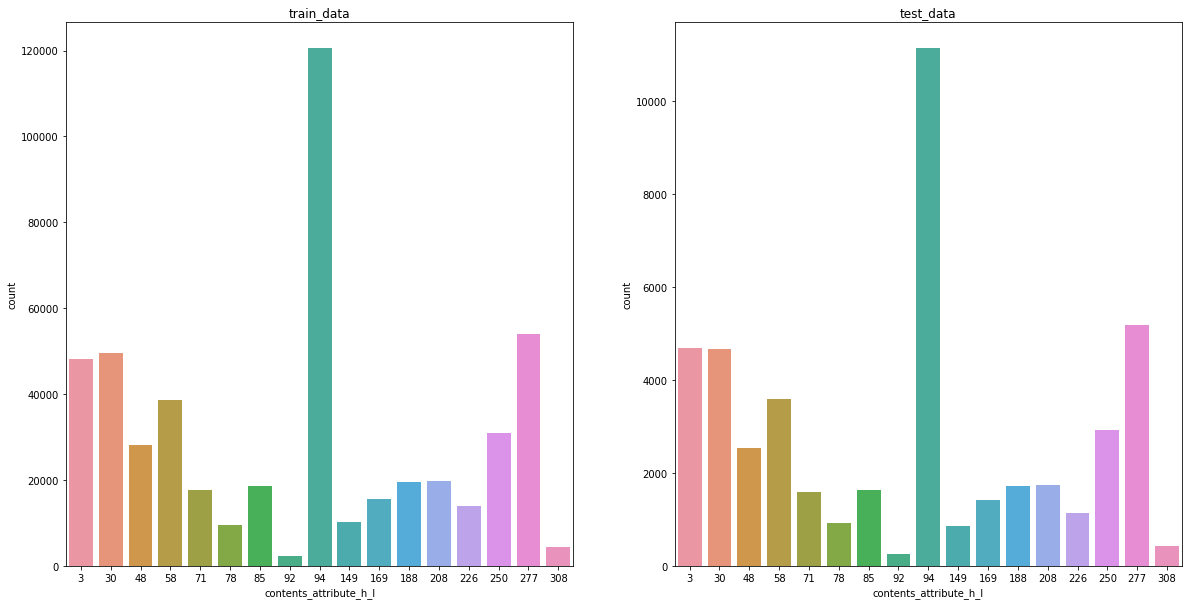

In [ ]:
# contents_attribute_h_l

fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

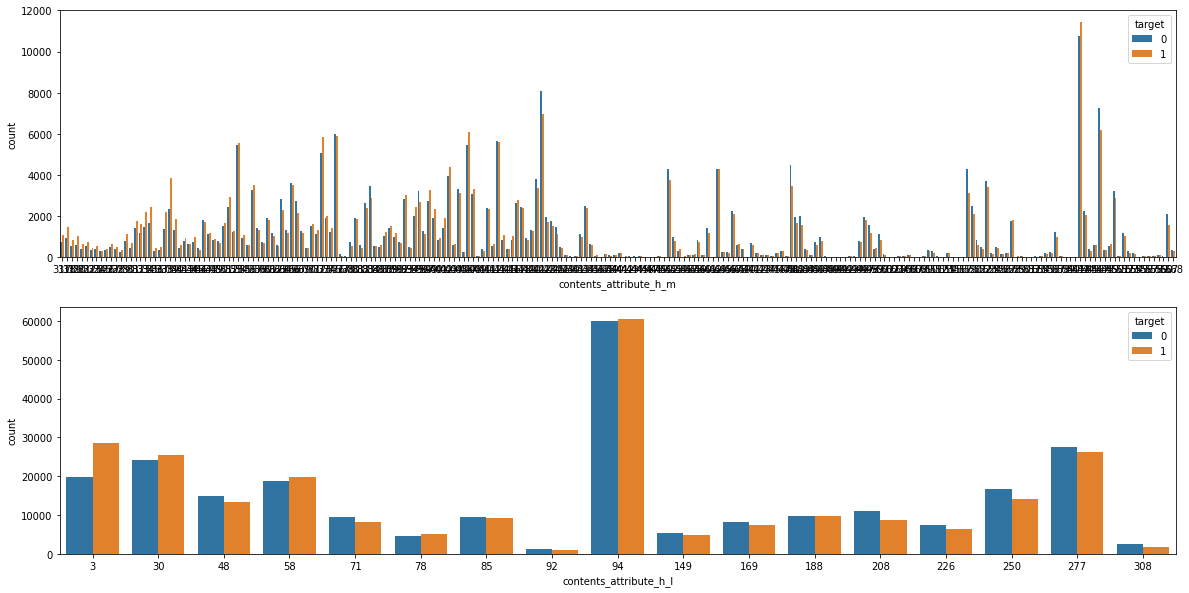

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_h_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_h_l', hue = 'target', ax = ax[1])

전체적으로 target을 선택한 비율은 비슷비슷 하다.

train 데이터와 test 데이터 비율도 비슷비슷 하다.

# 컨텐츠 열람 일시

In [ ]:
train_data['month']=train_data['contents_open_dt'].dt.strftime("%m")
train_data['date']=train_data['contents_open_dt'].dt.strftime("%d")
train_data['hour']=train_data['contents_open_dt'].dt.strftime("%H")
train_data['day']=train_data['contents_open_dt'].dt.strftime("%A")

train_data['month']=train_data['month'].astype(int)
train_data['date']=train_data['date'].astype(int)
train_data['hour']=train_data['hour'].astype(int)

In [ ]:
test_data['month']=test_data['contents_open_dt'].dt.strftime("%m")
test_data['date']=test_data['contents_open_dt'].dt.strftime("%d")
test_data['hour']=test_data['contents_open_dt'].dt.strftime("%H")
test_data['day']=test_data['contents_open_dt'].dt.strftime("%A")

test_data['month']=test_data['month'].astype(int)
test_data['date']=test_data['date'].astype(int)
test_data['hour']=test_data['hour'].astype(int)

In [ ]:
train_data.loc[train_data['day'] == 'Monday', 'day'] = 0
train_data.loc[train_data['day'] == 'Tuesday', 'day'] = 1
train_data.loc[train_data['day'] == 'Wednesday', 'day'] = 2
train_data.loc[train_data['day'] == 'Thursday', 'day'] = 3
train_data.loc[train_data['day'] == 'Friday', 'day'] = 4
train_data.loc[train_data['day'] == 'Saturday', 'day'] = 5
train_data.loc[train_data['day'] == 'Sunday', 'day'] = 6

In [ ]:
test_data.loc[test_data['day'] == 'Monday', 'day'] = 0
test_data.loc[test_data['day'] == 'Tuesday', 'day'] = 1
test_data.loc[test_data['day'] == 'Wednesday', 'day'] = 2
test_data.loc[test_data['day'] == 'Thursday', 'day'] = 3
test_data.loc[test_data['day'] == 'Friday', 'day'] = 4
test_data.loc[test_data['day'] == 'Saturday', 'day'] = 5
test_data.loc[test_data['day'] == 'Sunday', 'day'] = 6

In [ ]:
train_data.day = train_data.day.astype('int64')
test_data.day = test_data.day.astype('int64')

In [ ]:
month = train_data.groupby('month')['target'].sum().reset_index()
date = train_data.groupby('date')['target'].sum().reset_index()
hour = train_data.groupby('hour')['target'].sum().reset_index()
day = train_data.groupby('day')['target'].sum().reset_index()

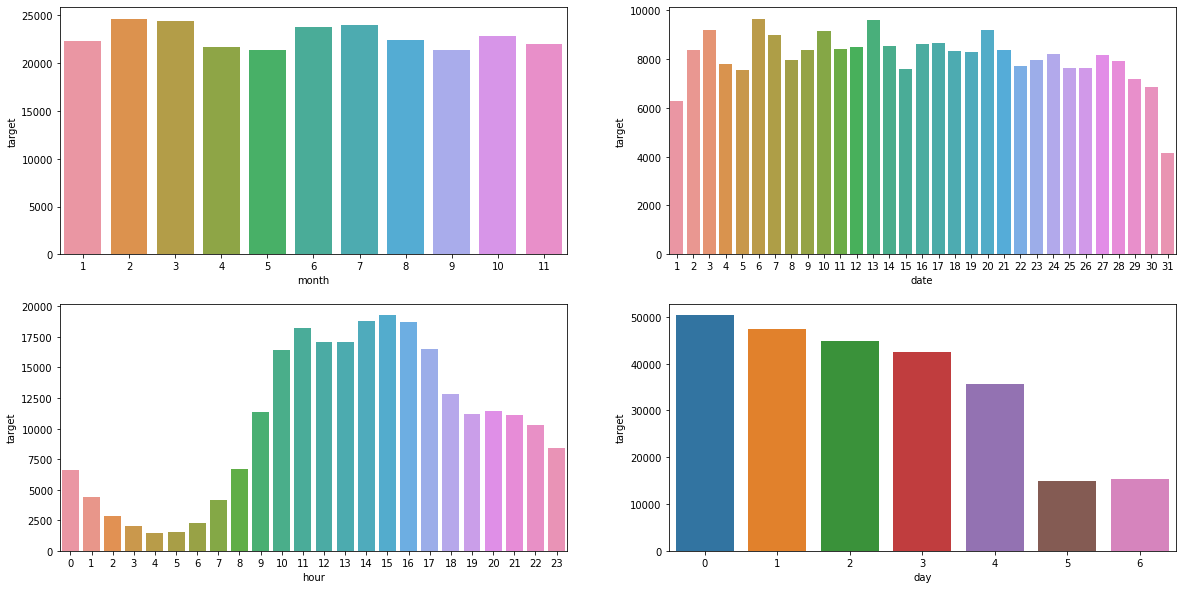

In [ ]:
figure, ax =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,10)


sns.barplot(data = month, x = 'month', y = 'target', ax=ax[0][0])
sns.barplot(data = date, x = 'date', y = 'target', ax=ax[0][1])
sns.barplot(data = hour, x = 'hour', y = 'target', ax=ax[1][0])
sns.barplot(data = day, x = 'day', y = 'target', ax=ax[1][1])


월과 일에는 영향이 별로 없음

낮시간에 이용빈도가 높음

평일에 이용빈도가 높고 주말에는 빈도가 낮음

# 트레인에는 있고 테스트에는 없는데이터 , 테스트에는 있고 트레인에는 없는 데이터 확인하기

In [ ]:
for i in test_data.columns : 
  print( i,'의 value_count')
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*50)

id 의 value_count
2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
2047     1
27975    1
32069    1
30020    1
19779    1
        ..
41633    1
43680    1
21151    1
23198    1
0        1
Name: id, Length: 46404, dtype: int64
--------------------------------------------------
d_l_match_yn 의 value_count
1    315268
0    186683
Name: d_l_match_yn, dtype: int64
1    28798
0    17606
Name: d_l_match_yn, dtype: int64
--------------------------------------------------
d_m_match_yn 의 value_count
0    368324
1    133627
Name: d_m_match_yn, dtype: int64
0    33904
1    12500
Name: d_m_match_yn, dtype: int64
--------------------------------------------------
d_s_match_yn 의 value_count
0    426694
1     75257
Name: d_s_match_yn, dtype: int64
0    39328
1     7076
Name: d_s_match_yn, dtype: int64
--------------------------------------------------
h_l_match_yn 의 value_count
1    

In [ ]:
a = []
b = []
for i in test_data.columns :
  if len(train_data[i].value_counts()) == len(test_data[i].value_counts().index) :
    a.append(i)
  else :
    b.append(i)
print(a)
print(b)

['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c', 'person_prefer_e', 'person_prefer_f', 'person_prefer_g', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m', 'contents_attribute_e', 'person_prefer_d_3_l', 'person_prefer_h_1_l', 'person_prefer_h_2_l', 'person_prefer_h_3_l', 'contents_attribute_h_l', 'date', 'hour', 'day']
['id', 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt', 'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_pr

In [ ]:
for i in a : 
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*60)

1    315268
0    186683
Name: d_l_match_yn, dtype: int64
1    28798
0    17606
Name: d_l_match_yn, dtype: int64
------------------------------------------------------------
0    368324
1    133627
Name: d_m_match_yn, dtype: int64
0    33904
1    12500
Name: d_m_match_yn, dtype: int64
------------------------------------------------------------
0    426694
1     75257
Name: d_s_match_yn, dtype: int64
0    39328
1     7076
Name: d_s_match_yn, dtype: int64
------------------------------------------------------------
1    399338
0    102613
Name: h_l_match_yn, dtype: int64
1    37315
0     9089
Name: h_l_match_yn, dtype: int64
------------------------------------------------------------
0    318818
1    183133
Name: h_m_match_yn, dtype: int64
0    28957
1    17447
Name: h_m_match_yn, dtype: int64
------------------------------------------------------------
0    365322
1    136629
Name: h_s_match_yn, dtype: int64
0    33430
1    12974
Name: h_s_match_yn, dtype: int64
-----------------------

In [ ]:
for i in b : 
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*60)

2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
2047     1
27975    1
32069    1
30020    1
19779    1
        ..
41633    1
43680    1
21151    1
23198    1
0        1
Name: id, Length: 46404, dtype: int64
------------------------------------------------------------
114     41720
102     25470
1227    24337
181     13213
857     13059
        ...  
191         1
801         1
914         1
559         1
1156        1
Name: person_prefer_d_1, Length: 1093, dtype: int64
114     3444
1227    2368
102     2041
181     1197
857     1014
        ... 
474        1
250        1
211        1
243        1
171        1
Name: person_prefer_d_1, Length: 955, dtype: int64
------------------------------------------------------------
181     49859
1086    19260
175     16558
102     14693
113     13769
        ...  
234         1
1165        1
84          1
556         1
271     

In [ ]:
x = []

#train_data['person_prefer_d_1_n'].values
for i in train_data['person_prefer_d_1_n'].value_counts().index.values : 
  if i not in test_data['person_prefer_d_1_n'].value_counts().index.values :
    x.append(i)

print(x)
print(len(x))

[511, 814, 678, 1099, 536, 867, 731, 828, 830, 686, 1162, 85, 273, 554, 602, 478, 480, 223, 858, 606, 654, 557, 7, 1223, 589, 380, 443, 553, 4, 730, 1185, 86, 621, 829, 504, 193, 1253, 1258, 472, 919, 84, 444, 476, 66, 76, 442, 488, 484, 737, 230, 191, 517]
52


In [ ]:
print(len(train_data['person_prefer_d_1_n'].value_counts().index.values))
print(len(test_data['person_prefer_d_1_n'].value_counts().index.values))

443
391


In [ ]:
check_list = ['person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 
              'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l', 
              'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'contents_attribute_d_n', 
              'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l', 'person_prefer_h_1_m', 
              'person_prefer_h_2_m', 'person_prefer_h_3_m', 'contents_attribute_h_m', 'contents_attribute_l_n', 
              'contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l']


## 트레인에는 있고 테스트에는 없는 데이터들

for i in check_list :
  x = []
  for j in train_data[i].value_counts().index.values : 
    if j not in test_data[i].value_counts().index.values :
      x.append(j)
  print(i)
  print(x)
  print(len(x))
  print('-'*60) 

person_prefer_d_1_n
[511, 814, 678, 1099, 536, 867, 731, 828, 830, 686, 1162, 85, 273, 554, 602, 478, 480, 223, 858, 606, 654, 557, 7, 1223, 589, 380, 443, 553, 4, 730, 1185, 86, 621, 829, 504, 193, 1253, 1258, 472, 919, 84, 444, 476, 66, 76, 442, 488, 484, 737, 230, 191, 517]
52
------------------------------------------------------------
person_prefer_d_1_s
[273, 440, 1258, 470, 488]
5
------------------------------------------------------------
person_prefer_d_1_m
[1258]
1
------------------------------------------------------------
person_prefer_d_1_l
[1258]
1
------------------------------------------------------------
person_prefer_d_2_n
[1099, 832, 692, 462, 641, 1050, 863, 65, 512, 218, 1166, 643, 199, 858, 588, 273, 230, 1223, 587, 314, 919, 1252, 192, 376, 1239, 263, 773, 510, 1245, 474, 1096, 1247, 5, 596, 69, 76, 887, 878, 606, 1151, 191, 85, 1258, 475, 503, 1190, 443, 480, 311, 1253, 553, 621, 872, 1221, 476, 555, 354, 489, 1161, 605, 380, 1167, 504, 498, 828, 556, 84, 488

In [ ]:
## 테스트에는 있고 트레인에는 없는 데이터들

for i in check_list :
  x = []
  for j in test_data[i].value_counts().index.values : 
    if j not in train_data[i].value_counts().index.values :
      x.append(j)
  print(i)
  print(x)
  print(len(x))
  print('-'*60) 

person_prefer_d_1_n
[]
0
------------------------------------------------------------
person_prefer_d_1_s
[]
0
------------------------------------------------------------
person_prefer_d_1_m
[]
0
------------------------------------------------------------
person_prefer_d_1_l
[]
0
------------------------------------------------------------
person_prefer_d_2_n
[445]
1
------------------------------------------------------------
person_prefer_d_2_s
[]
0
------------------------------------------------------------
person_prefer_d_2_m
[]
0
------------------------------------------------------------
person_prefer_d_2_l
[]
0
------------------------------------------------------------
person_prefer_d_3_n
[1185, 380]
2
------------------------------------------------------------
person_prefer_d_3_s
[]
0
------------------------------------------------------------
person_prefer_d_3_m
[]
0
------------------------------------------------------------
contents_attribute_d_n
[445, 828]
2
------

테스트에는 있고 트레인에는 없는데이터들을 어떻게 처리해야될까?? 

person_prefer_d_2_n

[445]

person_prefer_d_3_n

[1185, 380]

contents_attribute_d_n

[445, 828]

contents_attribute_l_n

[44, 1431, 273]

## peorson_prefer_d_2_n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

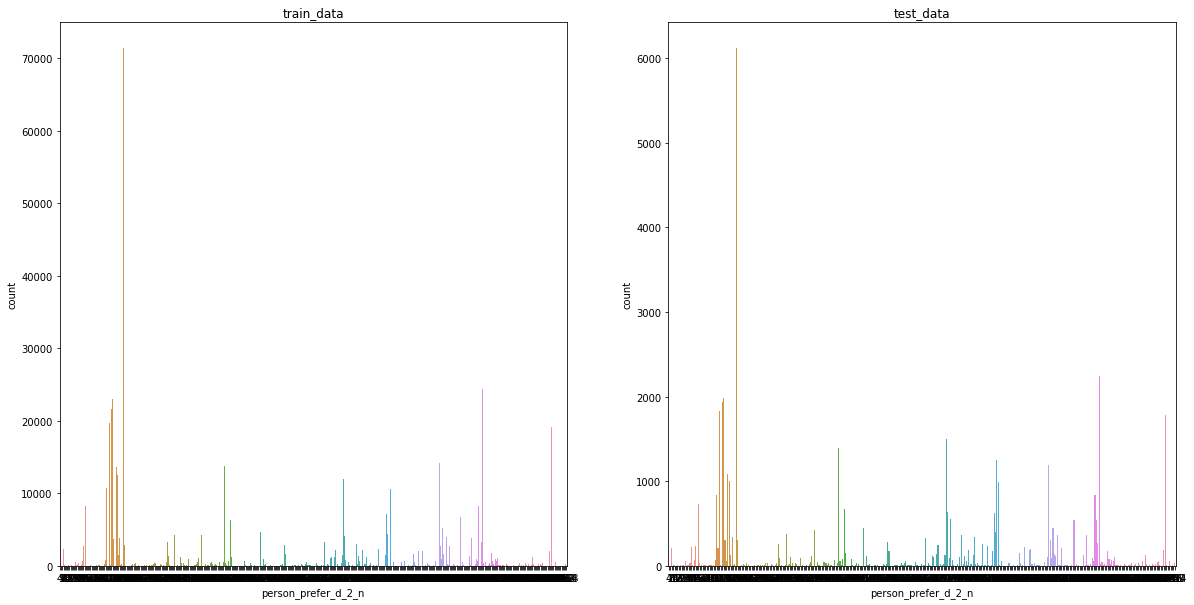

In [ ]:
# person_prefer_d_2_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [ ]:
print(len(train_data['person_prefer_d_2_n'].value_counts()))
print(len(test_data['person_prefer_d_2_n'].value_counts()))

435
362


In [ ]:
train_data['person_prefer_d_2_n'].value_counts().head(10)

175     71391
1086    24410
114     22957
110     21589
101     19643
1227    19163
968     14179
847     14130
452     13781
136     13701
Name: person_prefer_d_2_n, dtype: int64

In [ ]:
test_data['person_prefer_d_2_n'].value_counts().head(10)

175     6119
1086    2244
114     1986
110     1932
101     1832
1227    1778
703     1499
452     1396
847     1255
968     1192
Name: person_prefer_d_2_n, dtype: int64

In [ ]:
test_data.loc[test_data['person_prefer_d_2_n'] == 445]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
43139  43139             1             1             1  ...     12    31    11    3

[1 rows x 66 columns]

## person_prefer_d_3_n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

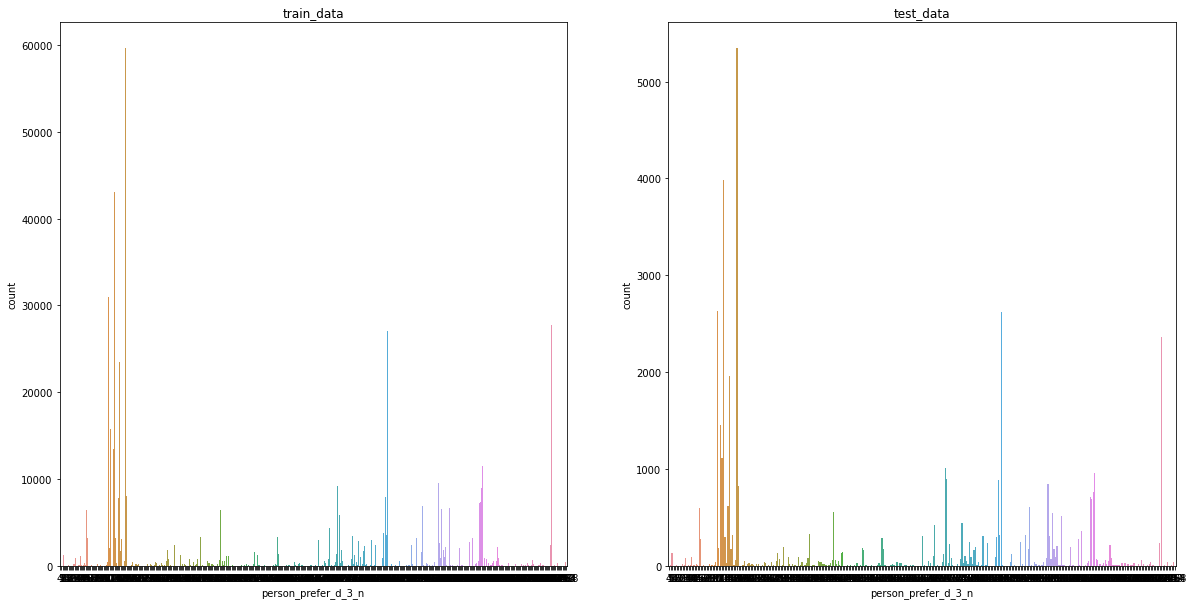

In [ ]:
# person_prefer_d_3_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [ ]:
test_data.loc[test_data['person_prefer_d_3_n'] == 1185]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
8161    8161             1             0             0  ...     12    30    19    2
10277  10277             1             0             0  ...     12    30    19    2

[2 rows x 66 columns]

In [ ]:
test_data.loc[test_data['person_prefer_d_3_n'] == 380]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
18573  18573             1             0             0  ...     12     7    19    0

[1 rows x 66 columns]

## contents_attribute_d_n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

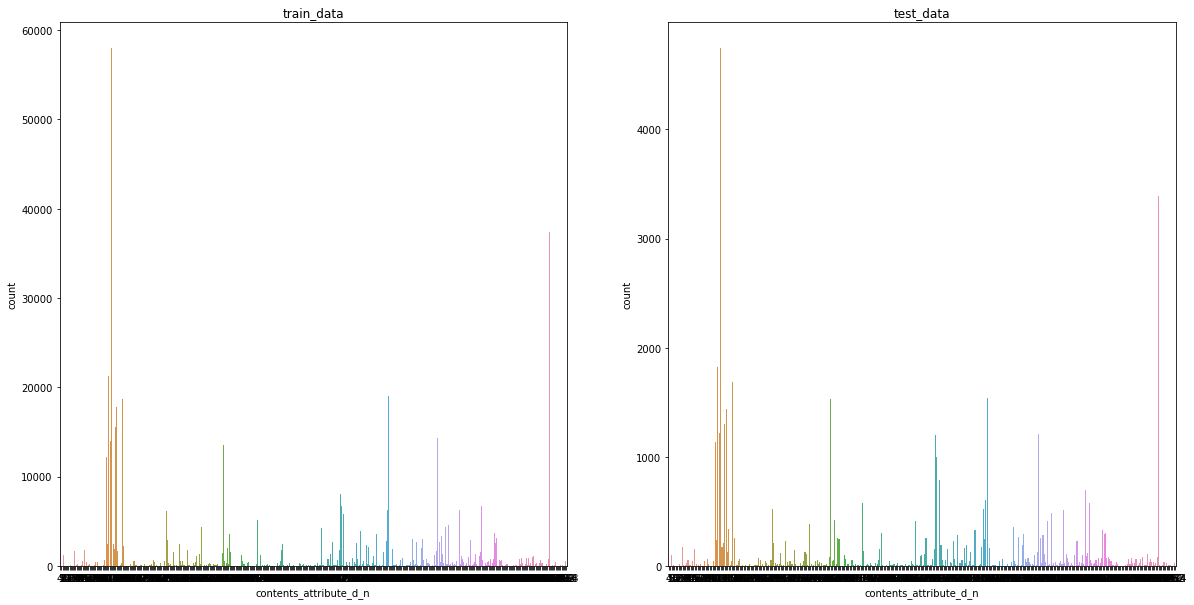

In [ ]:
# contents_attribute_d_n 
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [ ]:
test_data.loc[test_data['contents_attribute_d_n'] == 445]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
18346  18346             0             0             0  ...     12    31    15    3

[1 rows x 66 columns]

In [ ]:
test_data.loc[test_data['contents_attribute_d_n'] == 828]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
952  952             0             0             0  ...     12     9     7    2

[1 rows x 66 columns]

## contents_attribute_l_n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

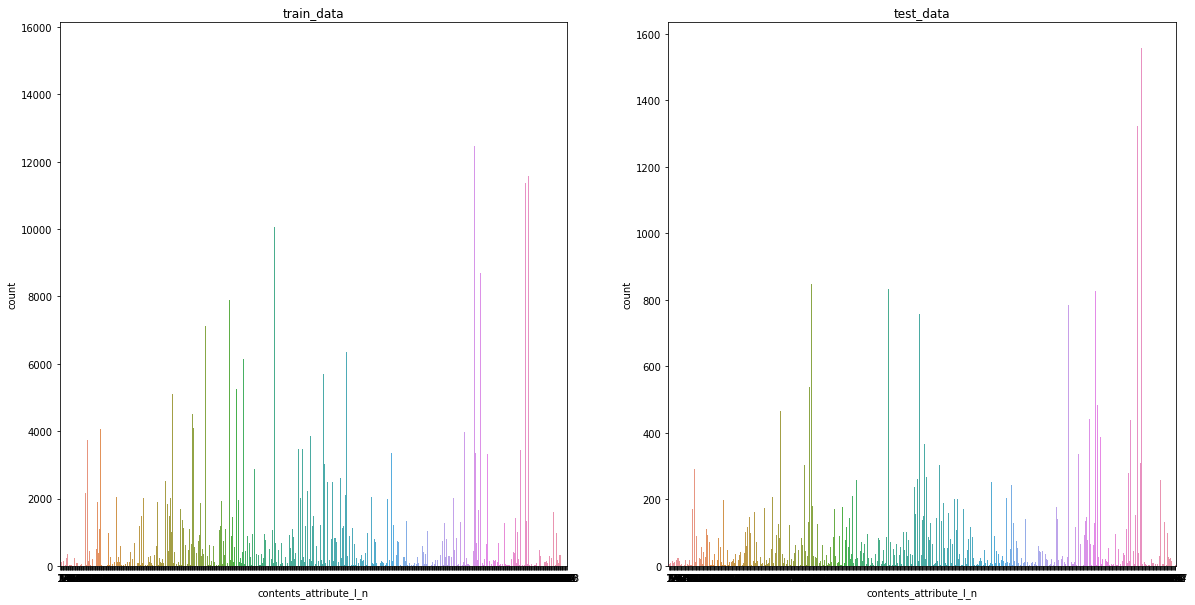

In [ ]:
# contents_attribute_l_n 
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [ ]:
test_data.loc[test_data['contents_attribute_l_n'] == 44]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
246      246             0             0             0  ...     12     8    17    1
626      626             0             0             0  ...     12    28    17    0
1680    1680             0             0             0  ...     12    28    22    0
33660  33660             0             0             0  ...     12    31    13    3

[4 rows x 66 columns]

In [ ]:
test_data.loc[test_data['contents_attribute_l_n'] == 1431]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
597  597             0             0             0  ...     12    11    16    4

[1 rows x 66 columns]

In [ ]:
test_data.loc[test_data['contents_attribute_l_n'] == 273]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  month  date  hour  day
43924  43924             1             0             0  ...     12    13    23    6

[1 rows x 66 columns]

# 기본적인 모델 돌려보기

In [ ]:
df = train_data.drop(['id','target','contents_open_dt'],axis = 1)
target = train_data['target']

In [ ]:
models = {
    'catboost' : CatBoostClassifier(),
    'Xgboost' : XGBClassifier(),
    'lightgbm' : LGBMClassifier(),
    'Random Forest' : RandomForestClassifier()
}

for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('f1 : ', round(f1_score(y_test,y_pred), 4))
  print('-'*100)

Learning rate set to 0.133271
0:	learn: 0.6876834	total: 211ms	remaining: 3m 30s
1:	learn: 0.6835655	total: 352ms	remaining: 2m 55s
2:	learn: 0.6803586	total: 520ms	remaining: 2m 52s
3:	learn: 0.6779112	total: 663ms	remaining: 2m 45s
4:	learn: 0.6760045	total: 814ms	remaining: 2m 41s
5:	learn: 0.6744023	total: 952ms	remaining: 2m 37s
6:	learn: 0.6731643	total: 1.1s	remaining: 2m 36s
7:	learn: 0.6721470	total: 1.26s	remaining: 2m 36s
8:	learn: 0.6710399	total: 1.41s	remaining: 2m 34s
9:	learn: 0.6701925	total: 1.55s	remaining: 2m 33s
10:	learn: 0.6693809	total: 1.7s	remaining: 2m 32s
11:	learn: 0.6686298	total: 1.86s	remaining: 2m 33s
12:	learn: 0.6679318	total: 2s	remaining: 2m 31s
13:	learn: 0.6674313	total: 2.13s	remaining: 2m 29s
14:	learn: 0.6669011	total: 2.27s	remaining: 2m 29s
15:	learn: 0.6664658	total: 2.42s	remaining: 2m 28s
16:	learn: 0.6658354	total: 2.58s	remaining: 2m 29s
17:	learn: 0.6653878	total: 2.74s	remaining: 2m 29s
18:	learn: 0.6650871	total: 2.87s	remaining: 2m 2

# 테스트가 imbalance한 데이터를 어떻게 처리해야될까?

train과 test를 imbalance 하게 만들어서 학습 시켜보자


## 비율 10 : 1

In [ ]:
train_data = train_data.drop(['id', 'person_prefer_f', 'person_prefer_g', 'contents_open_dt'], axis = 1)
test_data = test_data.drop(['id', 'person_prefer_f', 'person_prefer_g', 'contents_open_dt'], axis = 1)

In [ ]:
#train_test_split 으로 train과 test 임의로 분류

train_, test_ = train_test_split(train_data, test_size = 0.2, random_state = 42)

In [ ]:
train_['target'].value_counts()

0    200947
1    200613
Name: target, dtype: int64

In [ ]:
test_['target'].value_counts()

1    50232
0    50159
Name: target, dtype: int64

In [ ]:
# train에서 타겟이 0인것과 1인것 분류
train_0 = train_.loc[train_['target'] == 0]
train_1 = train_.loc[train_['target'] == 1]

In [ ]:
# test에서 타겟이 0인것과 1인것 분류
test_0 = test_.loc[test_['target'] == 0]
test_1 = test_.loc[test_['target'] == 1]

In [ ]:
# train에서 타겟이 0인것중 train, test 분류
train_0_train, train_0_test = train_test_split(train_0, test_size = 0.1, random_state = 42)

In [ ]:
# test에서 타겟이 0인것중 train, test 분류
test_0_train, test_0_test = train_test_split(test_0, test_size = 0.1, random_state = 42)

In [ ]:
train_0_train

d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day
260445             1             0             0  ...    30     5    1
113011             0             0             0  ...     6    11    0
176446             1             0             0  ...     4    19    2
230476             1             1             0  ...     7    11    1
723                0             0             0  ...     3     3    2
...              ...           ...           ...  ...   ...   ...  ...
257357             0             0             0  ...     2     8    3
143176             1             1             1  ...    25     7    1
136457             1             0             0  ...    22    17    2
88134              0             0             0  ...    27     8    2
265189             0             0             0  ...     4    14    2

[180852 rows x 63 columns]

In [ ]:
train_0_test

d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day
251093             0             0             0  ...     7    21    2
281166             0             0             0  ...    16    15    0
264092             0             0             0  ...     5    17    0
32248              0             0             0  ...     3     0    0
314896             1             0             0  ...     7     8    1
...              ...           ...           ...  ...   ...   ...  ...
232881             0             0             0  ...    28     9    6
114112             1             0             0  ...    17    22    3
54189              1             1             0  ...    28    14    2
79661              1             0             0  ...    16    12    3
24960              1             0             0  ...    30     9    0

[20095 rows x 63 columns]

In [ ]:
train = pd.concat([train_1, train_0_test], axis = 0) # train에서 타겟이 1인것 과 train에서 타겟이 0인것중 테스트로 분류한것 합치기
test = pd.concat([test_1, test_0_test], axis = 0) # test에서 타겟이 1인것 과 test에서 타겟이 0인것중 테스트로 분류한것 합치기

In [ ]:
train

d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day
470805             1             0             0  ...    14    15    1
9771               0             0             0  ...    20    17    3
490173             1             1             1  ...     9    19    4
434187             1             1             0  ...    20    22    0
319581             0             0             0  ...     3    23    0
...              ...           ...           ...  ...   ...   ...  ...
232881             0             0             0  ...    28     9    6
114112             1             0             0  ...    17    22    3
54189              1             1             0  ...    28    14    2
79661              1             0             0  ...    16    12    3
24960              1             0             0  ...    30     9    0

[220708 rows x 63 columns]

In [ ]:
test

d_l_match_yn  d_m_match_yn  d_s_match_yn  ...  date  hour  day
42085              1             0             0  ...     7    15    4
494803             1             1             1  ...    10    12    1
283408             0             0             0  ...    23    15    0
33052              1             1             0  ...     9    16    1
434511             1             0             0  ...    11     6    2
...              ...           ...           ...  ...   ...   ...  ...
268523             1             1             1  ...    17    18    1
230922             0             0             0  ...    11     9    5
232664             0             0             0  ...    22    17    2
332844             0             0             0  ...    19    19    2
363561             1             1             0  ...    19     8    6

[55248 rows x 63 columns]

In [ ]:
train.target.value_counts()

1    200613
0     20095
Name: target, dtype: int64

In [ ]:
test.target.value_counts()

1    50232
0     5016
Name: target, dtype: int64

In [ ]:
X_train = train.drop('target', axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']

In [ ]:
cat = CatBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
bag = BaggingClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)

In [ ]:
def modelling (model, X_train, X_test, y_train, y_test) :
  model.fit(X_train, y_train)
  pred = model.predict(X_train)
  pred_df = pd.DataFrame(pred, columns = ['target'])
  f1_train = f1_score(y_train, pred_df)
  y_pred = model.predict(X_test)
  y_pred_df = pd.DataFrame(y_pred, columns = ['target'])
  f1_test = f1_score(y_test, y_pred_df)
  return f1_train, f1_test

In [ ]:
model_dict = {'CatBoostClassifier' : cat, 'XGBClassifier' : xgb, 'LGBMClassifier' : lgb, 'RandomForestClassifier' : rfc,
             'AdaBoostClassifier' : ada, 'BaggingClassifier' : bag, 'GradientBoostingClassifier' : gbc}



result_df = pd.DataFrame(columns = ['name', 'f1_train', 'f1_test'])

for key, val in model_dict.items() : 
  
  result = modelling(val, X_train, X_test, y_train, y_test)
  result_df = result_df.append({'name' :  key, 'f1_train' : result[0], 'f1_test' : result[1]}, ignore_index = True)

result_df = result_df.sort_values('f1_test', ascending = False)
result_df = result_df.reset_index()
result_df.drop('index', axis = 1, inplace = True)

Learning rate set to 0.103215
0:	learn: 0.6009828	total: 114ms	remaining: 1m 54s
1:	learn: 0.5321360	total: 201ms	remaining: 1m 40s
2:	learn: 0.4792565	total: 297ms	remaining: 1m 38s
3:	learn: 0.4389921	total: 376ms	remaining: 1m 33s
4:	learn: 0.4071947	total: 466ms	remaining: 1m 32s
5:	learn: 0.3833003	total: 538ms	remaining: 1m 29s
6:	learn: 0.3653300	total: 621ms	remaining: 1m 28s
7:	learn: 0.3514083	total: 701ms	remaining: 1m 26s
8:	learn: 0.3403436	total: 792ms	remaining: 1m 27s
9:	learn: 0.3313828	total: 892ms	remaining: 1m 28s
10:	learn: 0.3240880	total: 985ms	remaining: 1m 28s
11:	learn: 0.3186645	total: 1.07s	remaining: 1m 27s
12:	learn: 0.3143787	total: 1.16s	remaining: 1m 28s
13:	learn: 0.3106961	total: 1.25s	remaining: 1m 28s
14:	learn: 0.3077881	total: 1.33s	remaining: 1m 27s
15:	learn: 0.3054725	total: 1.42s	remaining: 1m 27s
16:	learn: 0.3037796	total: 1.49s	remaining: 1m 26s
17:	learn: 0.3022911	total: 1.57s	remaining: 1m 25s
18:	learn: 0.3010646	total: 1.65s	remaining:

In [ ]:
result_df

name  f1_train   f1_test
0          CatBoostClassifier  0.954442  0.952936
1              LGBMClassifier  0.952825  0.952695
2      RandomForestClassifier  0.999978  0.952499
3               XGBClassifier  0.952454  0.952456
4  GradientBoostingClassifier  0.952473  0.952424
5          AdaBoostClassifier  0.952395  0.952395
6           BaggingClassifier  0.996641  0.947181

## 비율 5 : 1

In [ ]:
#train_test_split 으로 train과 test 임의로 분류

train_, test_ = train_test_split(train_data, test_size = 0.3, random_state = 42)

# train에서 타겟이 0인것과 1인것 분류
train_0 = train_.loc[train_['target'] == 0]
train_1 = train_.loc[train_['target'] == 1]

# test에서 타겟이 0인것과 1인것 분류
test_0 = test_.loc[test_['target'] == 0]
test_1 = test_.loc[test_['target'] == 1]

# train에서 타겟이 0인것중 train, test 분류
train_0_train, train_0_test = train_test_split(train_0, test_size = 0.2, random_state = 42)

# test에서 타겟이 0인것중 train, test 분류
test_0_train, test_0_test = train_test_split(test_0, test_size = 0.2, random_state = 42)

train = pd.concat([train_1, train_0_test], axis = 0) # train에서 타겟이 1인것 과 train에서 타겟이 0인것중 테스트로 분류한것 합치기
test = pd.concat([test_1, test_0_test], axis = 0) # test에서 타겟이 1인것 과 test에서 타겟이 0인것중 테스트로 분류한것 합치기

In [ ]:
train.target.value_counts()

1    175464
0     35181
Name: target, dtype: int64

In [ ]:
test.target.value_counts()

1    75381
0    15041
Name: target, dtype: int64

In [ ]:
X_train = train.drop('target', axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']

cat = CatBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
bag = BaggingClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)

model_dict = {'CatBoostClassifier' : cat, 'XGBClassifier' : xgb, 'LGBMClassifier' : lgb, 'RandomForestClassifier' : rfc,
             'AdaBoostClassifier' : ada, 'BaggingClassifier' : bag, 'GradientBoostingClassifier' : gbc}



result_df = pd.DataFrame(columns = ['name', 'f1_train', 'f1_test'])

for key, val in model_dict.items() : 
  
  result = modelling(val, X_train, X_test, y_train, y_test)
  result_df = result_df.append({'name' :  key, 'f1_train' : result[0], 'f1_test' : result[1]}, ignore_index = True)

result_df = result_df.sort_values('f1_test', ascending = False)
result_df = result_df.reset_index()
result_df.drop('index', axis = 1, inplace = True)

Learning rate set to 0.101179
0:	learn: 0.6398385	total: 82.2ms	remaining: 1m 22s
1:	learn: 0.5982949	total: 172ms	remaining: 1m 25s
2:	learn: 0.5650772	total: 265ms	remaining: 1m 28s
3:	learn: 0.5392082	total: 347ms	remaining: 1m 26s
4:	learn: 0.5185232	total: 437ms	remaining: 1m 26s
5:	learn: 0.5020647	total: 526ms	remaining: 1m 27s
6:	learn: 0.4899037	total: 607ms	remaining: 1m 26s
7:	learn: 0.4802815	total: 681ms	remaining: 1m 24s
8:	learn: 0.4720265	total: 765ms	remaining: 1m 24s
9:	learn: 0.4651071	total: 860ms	remaining: 1m 25s
10:	learn: 0.4596106	total: 941ms	remaining: 1m 24s
11:	learn: 0.4553851	total: 1.03s	remaining: 1m 24s
12:	learn: 0.4518277	total: 1.1s	remaining: 1m 23s
13:	learn: 0.4491522	total: 1.19s	remaining: 1m 23s
14:	learn: 0.4467275	total: 1.29s	remaining: 1m 24s
15:	learn: 0.4449017	total: 1.37s	remaining: 1m 24s
16:	learn: 0.4433262	total: 1.46s	remaining: 1m 24s
17:	learn: 0.4419450	total: 1.55s	remaining: 1m 24s
18:	learn: 0.4410215	total: 1.64s	remaining:

In [ ]:
result_df

name  f1_train   f1_test
0          CatBoostClassifier  0.914108  0.910995
1              LGBMClassifier  0.910971  0.910660
2      RandomForestClassifier  0.999991  0.910285
3               XGBClassifier  0.909579  0.909942
4  GradientBoostingClassifier  0.909646  0.909927
5          AdaBoostClassifier  0.909185  0.909690
6           BaggingClassifier  0.995125  0.892087

In [ ]:
cat_pred = cat.predict(test_data)

cat_pred = pd.DataFrame(cat_pred, columns = ['cat_pred'])

cat_pred.value_counts()

cat_pred
1           44943
0            1461
dtype: int64

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/jobcare/sample_submission.csv')
submission['target'] = cat_pred

In [ ]:
# submission.to_csv('/content/drive/MyDrive/jobcare/submission_cat(5:1).csv', index_label = False, index = False)

## 비율 7 : 1

In [ ]:
#train_test_split 으로 train과 test 임의로 분류

train_, test_ = train_test_split(train_data, test_size = 0.4, random_state = 42)

# train에서 타겟이 0인것과 1인것 분류
train_0 = train_.loc[train_['target'] == 0]
train_1 = train_.loc[train_['target'] == 1]

# test에서 타겟이 0인것과 1인것 분류
test_0 = test_.loc[test_['target'] == 0]
test_1 = test_.loc[test_['target'] == 1]

# train에서 타겟이 0인것중 train, test 분류
train_0_train, train_0_test = train_test_split(train_0, test_size = 0.15, random_state = 42)

# test에서 타겟이 0인것중 train, test 분류
test_0_train, test_0_test = train_test_split(test_0, test_size = 0.15, random_state = 42)

train = pd.concat([train_1, train_0_test], axis = 0) # train에서 타겟이 1인것 과 train에서 타겟이 0인것중 테스트로 분류한것 합치기
test = pd.concat([test_1, test_0_test], axis = 0) # test에서 타겟이 1인것 과 test에서 타겟이 0인것중 테스트로 분류한것 합치기

In [ ]:
train.target.value_counts()

1    150334
0     22626
Name: target, dtype: int64

In [ ]:
test.target.value_counts()

1    100511
0     15041
Name: target, dtype: int64

In [ ]:
X_train = train.drop('target', axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']

cat = CatBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
bag = BaggingClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)

model_dict = {'CatBoostClassifier' : cat, 'XGBClassifier' : xgb, 'LGBMClassifier' : lgb, 'RandomForestClassifier' : rfc,
             'AdaBoostClassifier' : ada, 'BaggingClassifier' : bag, 'GradientBoostingClassifier' : gbc}



result_df = pd.DataFrame(columns = ['name', 'f1_train', 'f1_test'])

for key, val in model_dict.items() : 
  
  result = modelling(val, X_train, X_test, y_train, y_test)
  result_df = result_df.append({'name' :  key, 'f1_train' : result[0], 'f1_test' : result[1]}, ignore_index = True)

result_df = result_df.sort_values('f1_test', ascending = False)
result_df = result_df.reset_index()
result_df.drop('index', axis = 1, inplace = True)

Learning rate set to 0.093012
0:	learn: 0.6306736	total: 73.5ms	remaining: 1m 13s
1:	learn: 0.5806773	total: 152ms	remaining: 1m 15s
2:	learn: 0.5413738	total: 241ms	remaining: 1m 19s
3:	learn: 0.5087428	total: 313ms	remaining: 1m 17s
4:	learn: 0.4836293	total: 376ms	remaining: 1m 14s
5:	learn: 0.4638590	total: 432ms	remaining: 1m 11s
6:	learn: 0.4473703	total: 520ms	remaining: 1m 13s
7:	learn: 0.4344125	total: 597ms	remaining: 1m 13s
8:	learn: 0.4238484	total: 664ms	remaining: 1m 13s
9:	learn: 0.4150004	total: 734ms	remaining: 1m 12s
10:	learn: 0.4084310	total: 801ms	remaining: 1m 11s
11:	learn: 0.4028598	total: 867ms	remaining: 1m 11s
12:	learn: 0.3981382	total: 942ms	remaining: 1m 11s
13:	learn: 0.3942436	total: 1.01s	remaining: 1m 11s
14:	learn: 0.3910509	total: 1.08s	remaining: 1m 10s
15:	learn: 0.3887147	total: 1.14s	remaining: 1m 10s
16:	learn: 0.3867009	total: 1.22s	remaining: 1m 10s
17:	learn: 0.3851722	total: 1.27s	remaining: 1m 9s
18:	learn: 0.3834806	total: 1.35s	remaining:

In [ ]:
result_df

name  f1_train   f1_test
0          CatBoostClassifier  0.934065  0.931313
1              LGBMClassifier  0.931514  0.931204
2      RandomForestClassifier  0.999997  0.930859
3               XGBClassifier  0.930325  0.930712
4  GradientBoostingClassifier  0.930413  0.930712
5          AdaBoostClassifier  0.930200  0.930517
6           BaggingClassifier  0.995963  0.920215

In [ ]:
cat_pred = cat.predict(test_data)

cat_pred = pd.DataFrame(cat_pred, columns = ['cat_pred'])

cat_pred.value_counts()

cat_pred
1           45575
0             829
dtype: int64

## 비율 7 : 2

In [ ]:
#train_test_split 으로 train과 test 임의로 분류

train_, test_ = train_test_split(train_data, test_size = 0.3, random_state = 42)

# train에서 타겟이 0인것과 1인것 분류
train_0 = train_.loc[train_['target'] == 0]
train_1 = train_.loc[train_['target'] == 1]

# test에서 타겟이 0인것과 1인것 분류
test_0 = test_.loc[test_['target'] == 0]
test_1 = test_.loc[test_['target'] == 1]

# train에서 타겟이 0인것중 train, test 분류
train_0_train, train_0_test = train_test_split(train_0, test_size = 0.3, random_state = 42)

# test에서 타겟이 0인것중 train, test 분류
test_0_train, test_0_test = train_test_split(test_0, test_size = 0.3, random_state = 42)

train = pd.concat([train_1, train_0_test], axis = 0) # train에서 타겟이 1인것 과 train에서 타겟이 0인것중 테스트로 분류한것 합치기
test = pd.concat([test_1, test_0_test], axis = 0) # test에서 타겟이 1인것 과 test에서 타겟이 0인것중 테스트로 분류한것 합치기

In [ ]:
train.target.value_counts()

1    175464
0     52771
Name: target, dtype: int64

In [ ]:
test.target.value_counts()

1    75381
0    22562
Name: target, dtype: int64

In [ ]:
X_train = train.drop('target', axis = 1)
y_train = train['target']
X_test = test.drop('target', axis = 1)
y_test = test['target']

cat = CatBoostClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
bag = BaggingClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)

model_dict = {'CatBoostClassifier' : cat, 'XGBClassifier' : xgb, 'LGBMClassifier' : lgb, 'RandomForestClassifier' : rfc,
             'AdaBoostClassifier' : ada, 'BaggingClassifier' : bag, 'GradientBoostingClassifier' : gbc}



result_df = pd.DataFrame(columns = ['name', 'f1_train', 'f1_test'])

for key, val in model_dict.items() : 
  
  result = modelling(val, X_train, X_test, y_train, y_test)
  result_df = result_df.append({'name' :  key, 'f1_train' : result[0], 'f1_test' : result[1]}, ignore_index = True)

result_df = result_df.sort_values('f1_test', ascending = False)
result_df = result_df.reset_index()
result_df.drop('index', axis = 1, inplace = True)

Learning rate set to 0.104704
0:	learn: 0.6577922	total: 83.9ms	remaining: 1m 23s
1:	learn: 0.6298099	total: 171ms	remaining: 1m 25s
2:	learn: 0.6087720	total: 272ms	remaining: 1m 30s
3:	learn: 0.5917731	total: 355ms	remaining: 1m 28s
4:	learn: 0.5780990	total: 451ms	remaining: 1m 29s
5:	learn: 0.5671051	total: 544ms	remaining: 1m 30s
6:	learn: 0.5590916	total: 628ms	remaining: 1m 29s
7:	learn: 0.5524878	total: 718ms	remaining: 1m 29s
8:	learn: 0.5466059	total: 796ms	remaining: 1m 27s
9:	learn: 0.5420537	total: 897ms	remaining: 1m 28s
10:	learn: 0.5385371	total: 994ms	remaining: 1m 29s
11:	learn: 0.5353895	total: 1.08s	remaining: 1m 28s
12:	learn: 0.5328890	total: 1.16s	remaining: 1m 28s
13:	learn: 0.5309009	total: 1.25s	remaining: 1m 27s
14:	learn: 0.5292061	total: 1.33s	remaining: 1m 27s
15:	learn: 0.5278668	total: 1.43s	remaining: 1m 27s
16:	learn: 0.5266632	total: 1.52s	remaining: 1m 28s
17:	learn: 0.5257342	total: 1.62s	remaining: 1m 28s
18:	learn: 0.5248961	total: 1.69s	remaining

In [ ]:
result_df

name  f1_train   f1_test
0          CatBoostClassifier  0.878830  0.873503
1              LGBMClassifier  0.873893  0.873140
2      RandomForestClassifier  1.000000  0.871905
3  GradientBoostingClassifier  0.871027  0.871703
4               XGBClassifier  0.870855  0.871642
5          AdaBoostClassifier  0.870164  0.870983
6           BaggingClassifier  0.994406  0.838883

In [ ]:
cat_pred = cat.predict(test_data)

cat_pred = pd.DataFrame(cat_pred, columns = ['cat_pred'])

cat_pred.value_counts()

cat_pred
1           43521
0            2883
dtype: int64